# Rain Prediction –Weather forecasting

# Problem Statement:
Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.

# Importing necessary libraries

In [1]:
#Importing the necessary Libraries

# linear algebra
import numpy as np

import warnings
warnings.filterwarnings('ignore')

#data processing
import pandas as pd

#data visualization
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style

#Alogithms
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor

import joblib

In [2]:
df=pd.read_csv('rainfall.csv')
df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0     2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1     2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2     2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3     2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4     2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   
...          ...      ...      ...      ...       ...          ...       ...   
8420  2017-06-21    Uluru      2.8     23.4       0.0          NaN       NaN   
8421  2017-06-22    Uluru      3.6     25.3       0.0          NaN       NaN   
8422  2017-06-23    Uluru      5.4     26.9       0.0          NaN       NaN   
8423  2017-06-24    Uluru      7.8     27.0       0.0          NaN       NaN   
8424  2017-06-25    Uluru     14.9      NaN       0.0          NaN       NaN   

     WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0              W           44.0          W  ...        71.0         22.0   
1            WNW           44.0        NNW  ...        44.0         25.0   
2            WSW           46.0          W  ...        38.0         30.0   
3             NE           24.0         SE  ...        45.0         16.0   
4              W           41.0        ENE  ...        82.0         33.0   
...          ...            ...        ...  ...         ...          ...   
8420           E           31.0         SE  ...        51.0         24.0   
8421         NNW           22.0         SE  ...        56.0         21.0   
8422           N           37.0         SE  ...        53.0         24.0   
8423          SE           28.0        SSE  ...        51.0         24.0   
8424         NaN            NaN        ESE  ...        62.0         36.0   

      Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
0          1007.7       1007.1       8.0       NaN     16.9     21.8   
1          1010.6       1007.8       NaN       NaN     17.2     24.3   
2          1007.6       1008.7       NaN       2.0     21.0     23.2   
3          1017.6       1012.8       NaN       NaN     18.1     26.5   
4          1010.8       1006.0       7.0       8.0     17.8     29.7   
...           ...          ...       ...       ...      ...      ...   
8420       1024.6       1020.3       NaN       NaN     10.1     22.4   
8421       1023.5       1019.1       NaN       NaN     10.9     24.5   
8422       1021.0       1016.8       NaN       NaN     12.5     26.1   
8423       1019.4       1016.5       3.0       2.0     15.1     26.0   
8424       1020.2       1017.9       8.0       8.0     15.0     20.9   

      RainToday  RainTomorrow  
0            No            No  
1            No            No  
2            No            No  
3            No            No  
4            No            No  
...         ...           ...  
8420         No            No  
8421         No            No  
8422         No            No  
8423         No            No  
8424         No           NaN  

[8425 rows x 23 columns]

In [3]:
#checking the top5 rows
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [4]:
#checking the last 5 rows
df.tail()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
8420  2017-06-21    Uluru      2.8     23.4       0.0          NaN       NaN   
8421  2017-06-22    Uluru      3.6     25.3       0.0          NaN       NaN   
8422  2017-06-23    Uluru      5.4     26.9       0.0          NaN       NaN   
8423  2017-06-24    Uluru      7.8     27.0       0.0          NaN       NaN   
8424  2017-06-25    Uluru     14.9      NaN       0.0          NaN       NaN   

     WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
8420           E           31.0         SE  ...        51.0         24.0   
8421         NNW           22.0         SE  ...        56.0         21.0   
8422           N           37.0         SE  ...        53.0         24.0   
8423          SE           28.0        SSE  ...        51.0         24.0   
8424         NaN            NaN        ESE  ...        62.0         36.0   

      Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
8420       1024.6       1020.3       NaN       NaN     10.1     22.4   
8421       1023.5       1019.1       NaN       NaN     10.9     24.5   
8422       1021.0       1016.8       NaN       NaN     12.5     26.1   
8423       1019.4       1016.5       3.0       2.0     15.1     26.0   
8424       1020.2       1017.9       8.0       8.0     15.0     20.9   

      RainToday  RainTomorrow  
8420         No            No  
8421         No            No  
8422         No            No  
8423         No            No  
8424         No           NaN  

[5 rows x 23 columns]

In [5]:
#checking the sample
df.sample(2)

Date     Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
5703  2010-10-12    Melbourne     18.3     23.4       0.0          8.0   
3184  2016-10-16  Williamtown      8.0     28.8       0.0          NaN   

      Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
5703       4.2           N           72.0          N  ...        55.0   
3184       NaN           N           35.0         NW  ...        63.0   

      Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
5703         54.0       1023.0       1019.8       7.0       7.0     20.0   
3184         26.0       1016.5       1010.4       NaN       NaN     18.1   

      Temp3pm  RainToday  RainTomorrow  
5703     22.8         No           Yes  
3184     28.2         No            No  

[2 rows x 23 columns]

# EDA

In [6]:
#checking the dimension of data
df.shape

(8425, 23)

In [7]:
#chekcing the  columns
df.columns.tolist()

['Date',
 'Location',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday',
 'RainTomorrow']

In [8]:
#checking the information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

it shows the missing vlaues and memory usages.

In [9]:
#checking the datatype
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

It shows 2 type of data abject type and float type 

In [10]:
#checking the missing values
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

many missing values are present in our dataset

<AxesSubplot:>

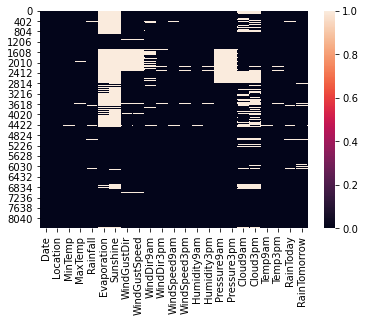

In [11]:
#heatmap for missing values
sns.heatmap(df.isnull())

# Handling Null values using imputation techniques

In [12]:
#filling the null values with mean and mode method.

df['MinTemp']=df['MinTemp'].fillna(df['MinTemp'].mean())
df['MaxTemp']=df['MaxTemp'].fillna(df['MaxTemp'].mean())
df['Rainfall']=df['Rainfall'].fillna(df['Rainfall'].mean())
df['Evaporation']=df['Evaporation'].fillna(df['Evaporation'].mean())
df['Sunshine']=df['Sunshine'].fillna(df['Sunshine'].mean())
df['WindGustDir']=df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])
df['WindGustSpeed']=df['WindGustSpeed'].fillna(df['WindGustSpeed'].mean())
df['WindDir9am']=df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])
df['WindDir3pm']=df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])
df['WindSpeed9am']=df['WindSpeed9am'].fillna(df['WindSpeed9am'].mean())
df['WindSpeed3pm']=df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].mean())
df['Humidity9am']=df['Humidity9am'].fillna(df['Humidity9am'].mean())
df['Humidity3pm']=df['Humidity3pm'].fillna(df['Humidity3pm'].mean())
df['Pressure9am']=df['Pressure9am'].fillna(df['Pressure9am'].mean())
df['Pressure3pm']=df['Pressure3pm'].fillna(df['Pressure3pm'].mean())
df['Cloud9am']=df['Cloud9am'].fillna(df['Cloud9am'].mean())
df['Cloud3pm']=df['Cloud3pm'].fillna(df['Cloud3pm'].mean())
df['Temp9am']=df['Temp9am'].fillna(df['Temp9am'].mean())
df['Temp3pm']=df['Temp3pm'].fillna(df['Temp3pm'].mean())
df['RainToday']=df['RainToday'].fillna(df['RainToday'].mode()[0])
df['RainTomorrow']=df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0])



In [13]:
#chekcing the  columns
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [14]:
#checking Again the missing values after filling

df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

now null values are not present

<AxesSubplot:>

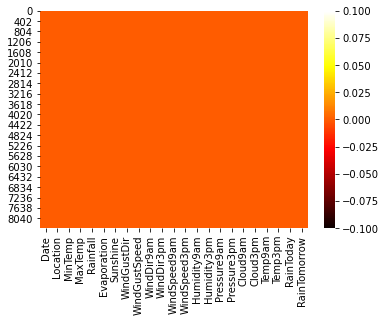

In [15]:
sns.heatmap(df.isnull(),cmap='hot')

In [16]:
#converting Date and time columns from object type to datetime type
df['Date']=pd.to_datetime(df['Date'])

In [17]:
#Rechacking the datatype
df.dtypes

Date             datetime64[ns]
Location                 object
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustDir              object
WindGustSpeed           float64
WindDir9am               object
WindDir3pm               object
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                float64
Cloud3pm                float64
Temp9am                 float64
Temp3pm                 float64
RainToday                object
RainTomorrow             object
dtype: object

Now we have converted object datatype in to datetime datatype.

Now splitting Date into Month Year and Day

In [18]:
#Extracting Day from Date column

df['Day'] = pd.to_datetime(df.Date,format="%d/%m/%Y").dt.day

In [19]:
# Extracting Month from Date column
df['Month'] = pd.to_datetime(df.Date, format="%d/%m/%Y").dt.month

In [20]:
# Extracting year from Date column
df['Year'] = pd.to_datetime(df.Date, format="%d/%m/%Y").dt.year

So we have splitted the column Date into integer datatype , now we can drop this column as it is of no use.



In [21]:
# Dropping Date_of_journey column
df.drop("Date",axis=1,inplace=True)

In [22]:
#let's again chekc dataframe
df.head()

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0   Albury     13.4     22.9       0.6     5.389395  7.632205           W   
1   Albury      7.4     25.1       0.0     5.389395  7.632205         WNW   
2   Albury     12.9     25.7       0.0     5.389395  7.632205         WSW   
3   Albury      9.2     28.0       0.0     5.389395  7.632205          NE   
4   Albury     17.5     32.3       1.0     5.389395  7.632205           W   

   WindGustSpeed WindDir9am WindDir3pm  ...  Pressure3pm  Cloud9am  Cloud3pm  \
0           44.0          W        WNW  ...       1007.1  8.000000  4.503183   
1           44.0        NNW        WSW  ...       1007.8  4.566622  4.503183   
2           46.0          W        WSW  ...       1008.7  4.566622  2.000000   
3           24.0         SE          E  ...       1012.8  4.566622  4.503183   
4           41.0        ENE         NW  ...       1006.0  7.000000  8.000000   

   Temp9am  Temp3pm  RainToday  RainTomorrow  Day  Month  Year  
0     16.9     21.8         No            No    1     12  2008  
1     17.2     24.3         No            No    2     12  2008  
2     21.0     23.2         No            No    3     12  2008  
3     18.1     26.5         No            No    4     12  2008  
4     17.8     29.7         No            No    5     12  2008  

[5 rows x 25 columns]

In [23]:
#checking dimension again
df.shape

(8425, 25)

In [24]:
#checking value counts for each columns

for i in df.columns:
    print(df[i].value_counts())
    print('\n')

Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64


 13.193305    75
 12.000000    74
 13.200000    71
 13.800000    69
 12.700000    68
              ..
 26.900000     1
-1.700000      1
-1.400000      1
-1.200000      1
-0.800000      1
Name: MinTemp, Length: 286, dtype: int64


19.0    87
23.8    75
19.8    74
25.0    71
22.3    68
        ..
44.9     1
10.0     1
43.1     1
40.6     1
10.7     1
Name: MaxTemp, Length: 332, dtype: int64


0.000000     5299
0.200000      406
2.805913      240
0.400000      177
0.600000      116
             ... 
6.300000        1
28.000000       1
38.800000       1
41.200000       1
15.700000       1
Name: Rainfall, Length: 251, dtype: int64


5.389395     3512
4.000000      180
3.000000      163
2.400000      147
2.200000 

# Description of Dataset


In [25]:
#statistical summary of the dataset
df.describe()

MinTemp      MaxTemp     Rainfall  Evaporation     Sunshine  \
count  8425.000000  8425.000000  8425.000000  8425.000000  8425.000000   
mean     13.193305    23.859976     2.805913     5.389395     7.632205   
std       5.379488     6.114516    10.309308     3.852004     2.825451   
min      -2.000000     8.200000     0.000000     0.000000     0.000000   
25%       9.300000    19.300000     0.000000     4.000000     7.632205   
50%      13.200000    23.300000     0.000000     5.389395     7.632205   
75%      17.300000    28.000000     1.400000     5.389395     8.900000   
max      28.500000    45.500000   371.000000   145.000000    13.900000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
count    8425.000000   8425.000000   8425.000000  8425.000000  8425.000000   
mean       40.174469     13.847646     18.533662    67.822496    51.249790   
std        13.776101     10.128579      9.704759    16.774231    18.311894   
min         7.000000      0.000000      0.000000    10.000000     6.000000   
25%        31.000000      6.000000     11.000000    56.000000    39.000000   
50%        40.174469     13.000000     19.000000    68.000000    51.000000   
75%        48.000000     20.000000     24.000000    80.000000    63.000000   
max       107.000000     63.000000     83.000000   100.000000    99.000000   

       Pressure9am  Pressure3pm     Cloud9am     Cloud3pm      Temp9am  \
count  8425.000000  8425.000000  8425.000000  8425.000000  8425.000000   
mean   1017.640233  1015.236075     4.566622     4.503183    17.762015   
std       6.275759     6.217451     2.429205     2.299419     5.608301   
min     989.800000   982.900000     0.000000     0.000000     1.900000   
25%    1014.000000  1011.400000     3.000000     3.000000    13.800000   
50%    1017.640233  1015.236075     4.566622     4.503183    17.762015   
75%    1021.300000  1018.800000     7.000000     7.000000    21.900000   
max    1039.000000  1036.000000     8.000000     8.000000    39.400000   

           Temp3pm          Day        Month         Year  
count  8425.000000  8425.000000  8425.000000  8425.000000  
mean     22.442934    15.741958     6.442136  2012.102433  
std       5.945849     8.787354     3.437994     2.473137  
min       7.300000     1.000000     1.000000  2008.000000  
25%      18.100000     8.000000     3.000000  2010.000000  
50%      22.000000    16.000000     6.000000  2011.000000  
75%      26.300000    23.000000     9.000000  2014.000000  
max      44.100000    31.000000    12.000000  2017.000000

This gives the statistical information of the dataset. The summary looks perfect. From the above description we can observe the following things.

The counts of all columns are same which means ther are no missing values present int he dataset.

The mean value is greater than the median(50%) in the columns so we can say they are skewed to right.


Also there is a huge difference in maximum and 75% percentile in the columns hich leads to outlies in those columns.

The std is high in some columns which means it has high rate of dispersion.

# Description Visualization


<AxesSubplot:>

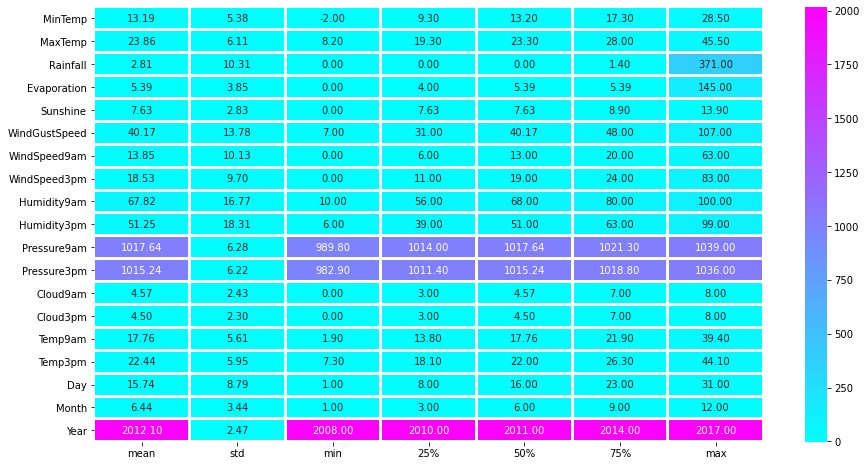

In [26]:
plt.figure(figsize=(15,8))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth = 2, annot = True, fmt = '.2f',cmap='cool')


# Lets separate numerical and categorical column.


In [27]:
#checking categorical columns
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [28]:
#checking numerical columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Day', 'Month', 'Year']


# Data Visualization


# Univariate Analysis
Plotting Categorical columns

Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64


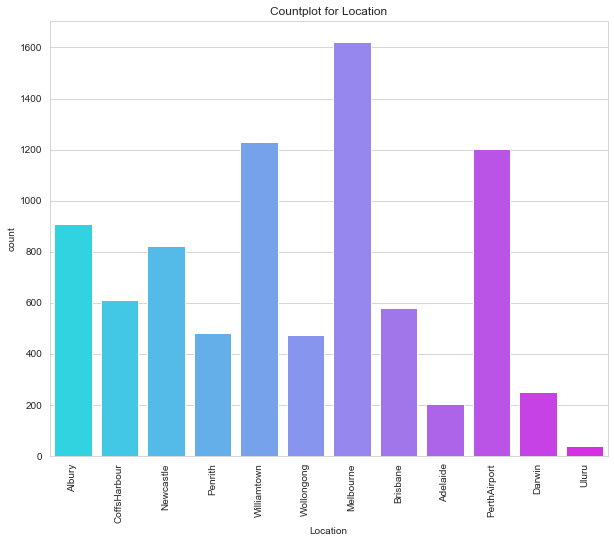

In [29]:
#countplot for location 
print(df['Location'].value_counts())
plt.figure(figsize=(10,8))
sns.set_style('whitegrid')
sns.countplot(df['Location'],palette='cool')
plt.title("Countplot for Location")
plt.xticks(rotation=90)
plt.show()

Melbourne,Williamtown and PerthAirport have high value counts

3     1704
10     578
8      577
12     572
0      557
14     531
13     507
15     504
9      484
1      415
11     396
7      383
4      353
5      343
2      302
6      219
Name: WindGustDir, dtype: int64


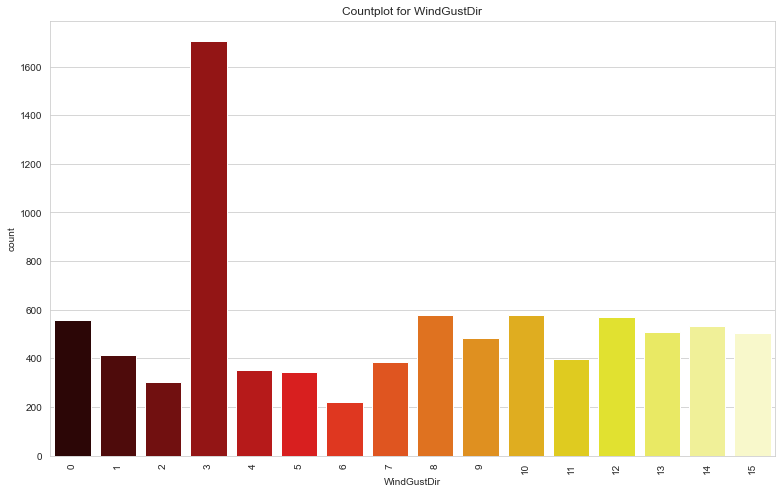

In [82]:
print(df['WindGustDir'].value_counts())
plt.figure(figsize=(13,8))
sns.countplot(df['WindGustDir'],palette='hot')
plt.title("Countplot for WindGustDir")
plt.xticks(rotation=90)
plt.show()

N having the Highest value count of 1704

N      1735
SW      704
NW      625
WSW     543
SE      505
WNW     480
SSW     467
ENE     433
NNE     430
W       414
NE      409
S       402
E       380
SSE     365
NNW     280
ESE     253
Name: WindDir9am, dtype: int64


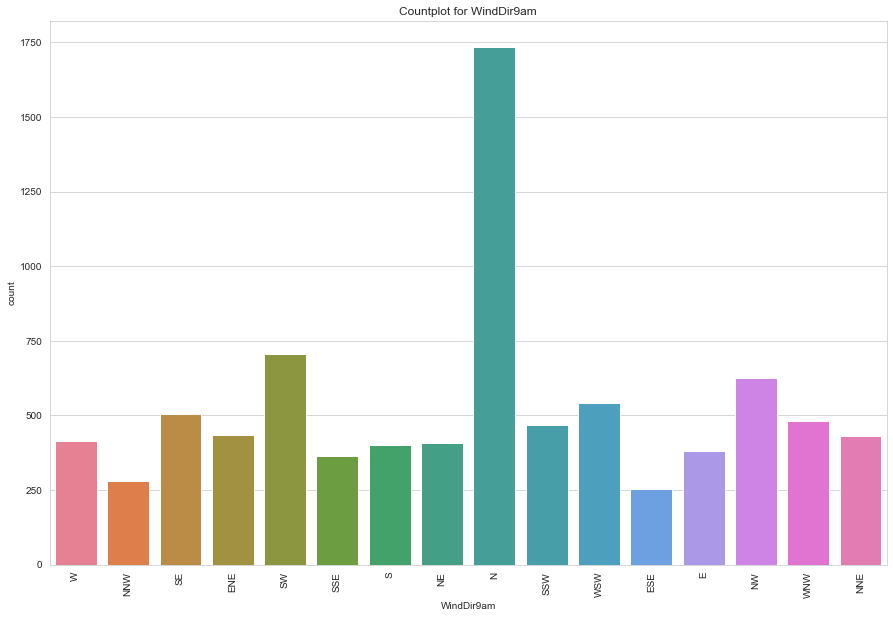

In [298]:
print(df['WindDir9am'].value_counts())
plt.figure(figsize=(15,10))
sns.countplot(df['WindDir9am'],palette='husl')
plt.title("Countplot for WindDir9am")
plt.xticks(rotation=90)
plt.show()

In WindDir9am column N is having the highest value count of 1735

9     1121
8      742
10     623
15     580
4      544
3      524
12     494
14     487
7      468
2      462
13     462
0      460
1      417
11     370
5      365
6      306
Name: WindDir3pm, dtype: int64


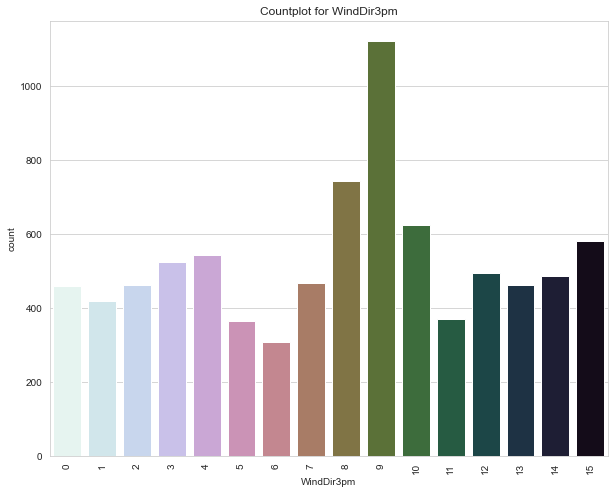

In [83]:
print(df['WindDir3pm'].value_counts())
plt.figure(figsize=(10,8))
sns.countplot(df['WindDir3pm'],palette='cubehelix_r')
plt.title("Countplot for WindDir3pm")
plt.xticks(rotation=90)
plt.show()

In  WindDir3pm column SE is having the highest value count of 1121 followed by S which is having the 742value count

0    6434
1    1991
Name: RainTomorrow, dtype: int64


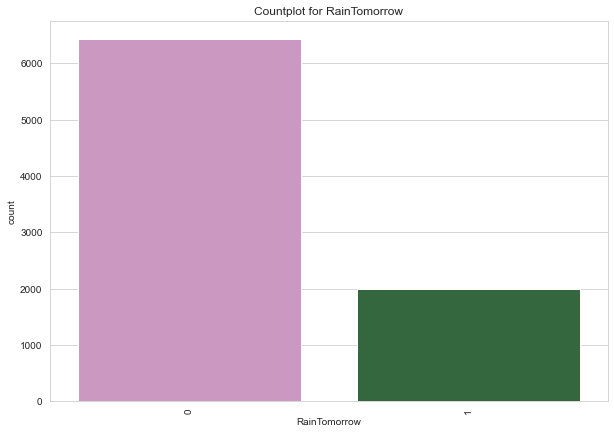

In [84]:
print(df['RainTomorrow'].value_counts())
plt.figure(figsize=(10,7))
sns.countplot(df['RainTomorrow'],palette='cubehelix_r')
plt.title("Countplot for RainTomorrow")
plt.xticks(rotation=90)
plt.show()

Our Data is imbalance NO value count is high then yes

# Distribution of skewness


# Plotting numerical columns


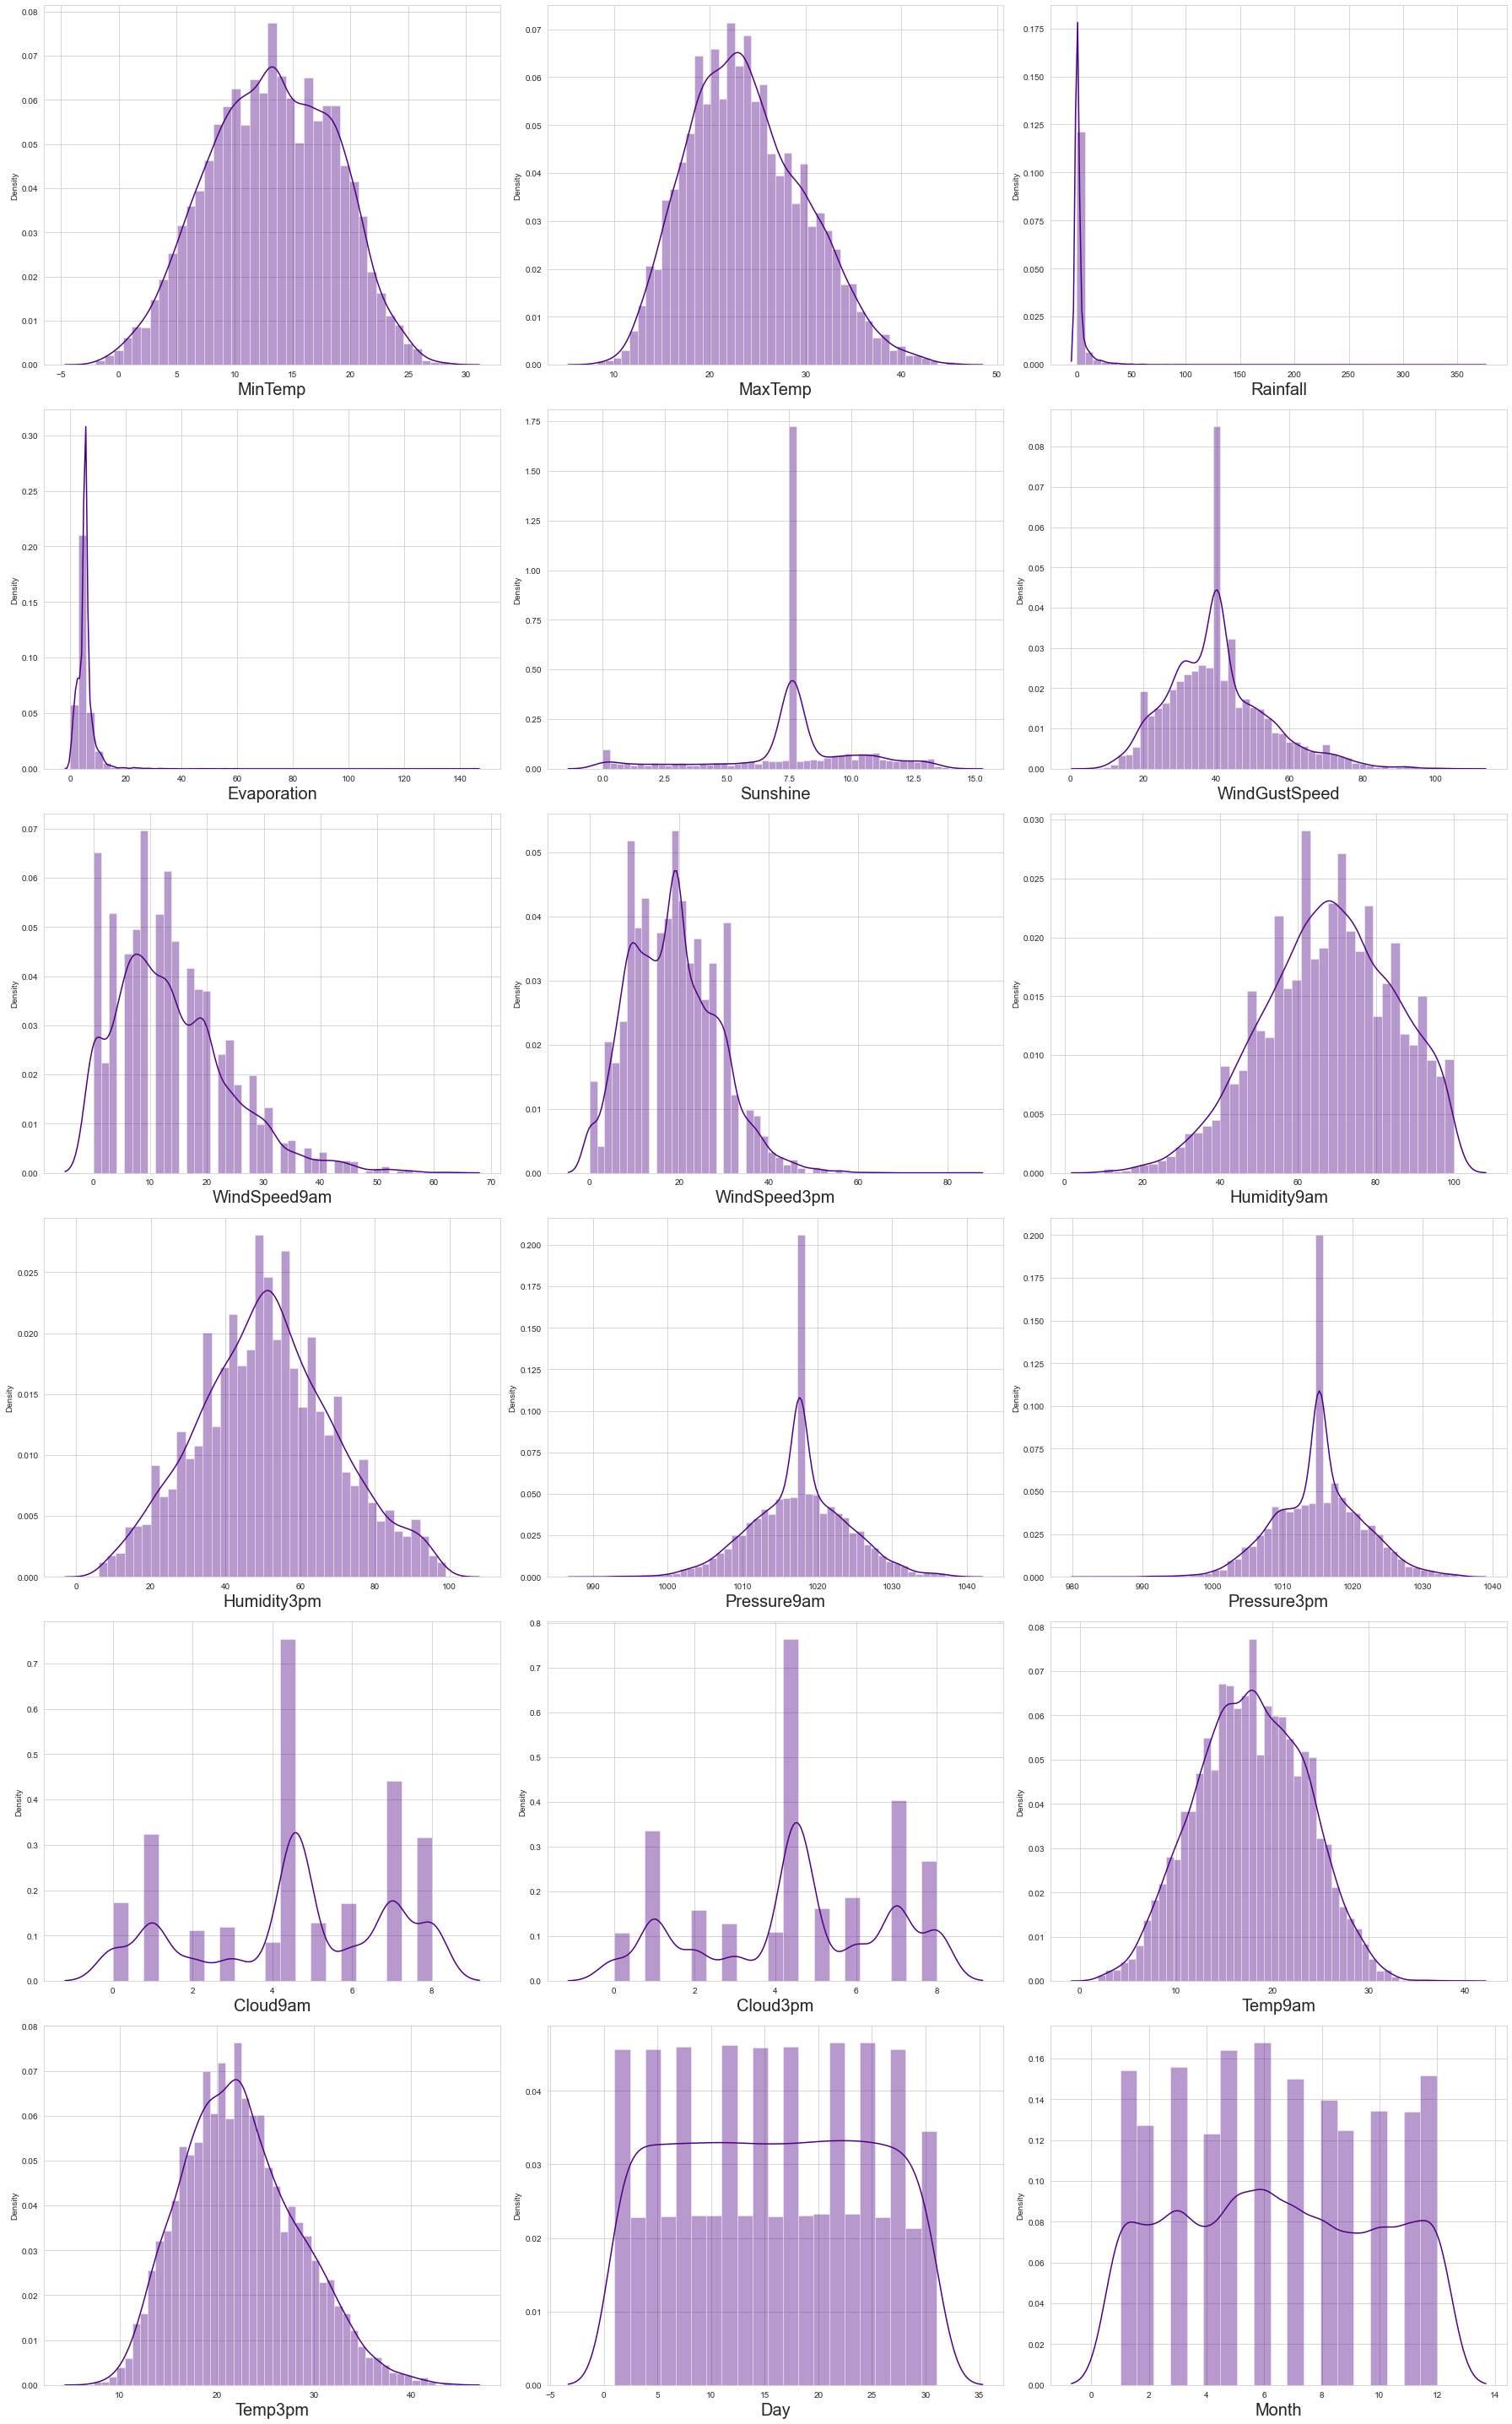

In [134]:
#checking numerical columns

plt.figure(figsize=(25,40))
plotnumber=1
for col in numerical_col:
    if plotnumber<=18:
        ax=plt.subplot(6,3,plotnumber)
        sns.distplot(df[col],color='indigo')
        plt.xlabel(col,fontsize=20)
    plotnumber+=1
    
plt.tight_layout()

From the distribution plot we can observe that the data i not normally distributed in some columns and some columns are almost normal but have no proper bell shape curve. columns are skewed to right as mean is more than the median.



# Bivariate Analysis


<AxesSubplot:xlabel='MinTemp', ylabel='RainTomorrow'>

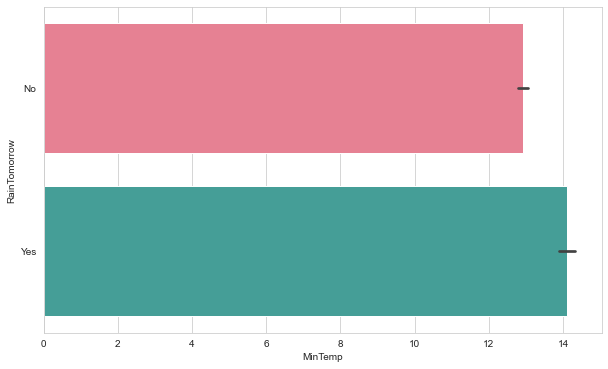

In [148]:
#checking the relationship b/w MinTemp and RainTomorrow
plt.figure(figsize=(10,6))
sns.barplot(df['MinTemp'],df['RainTomorrow'],data=df,palette='husl')

when minTemp is high rain will occur

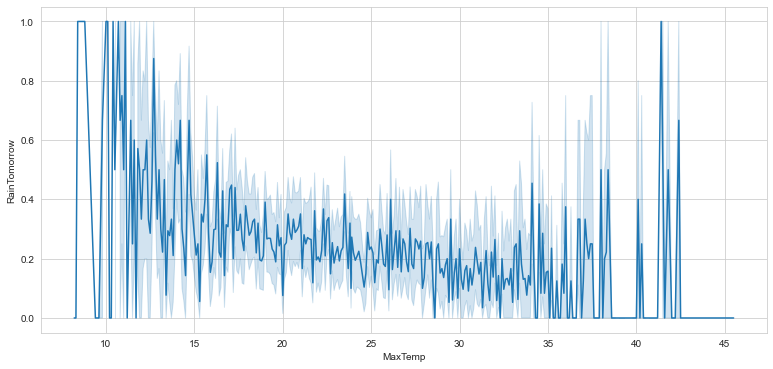

In [94]:
#checking the relationship b/w MaxTemp and RainTomorrow
plt.figure(figsize=(13,6))
sns.lineplot(df['MaxTemp'],df['RainTomorrow'],data=df,palette='hot')
plt.show()

when MaxTemp is high rain will not occur

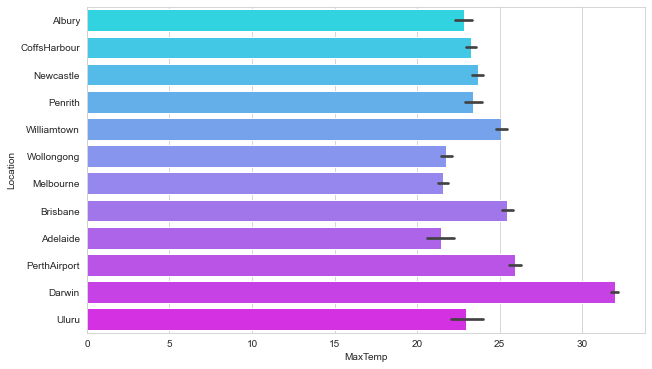

In [164]:
#checking the relationship b/w MaxTemp and RainTomorrow
plt.figure(figsize=(10,6))
sns.barplot(x='MaxTemp',y='Location',data=df,palette='cool')
plt.show()

Darwin and PerthAirplot having Maxtemp

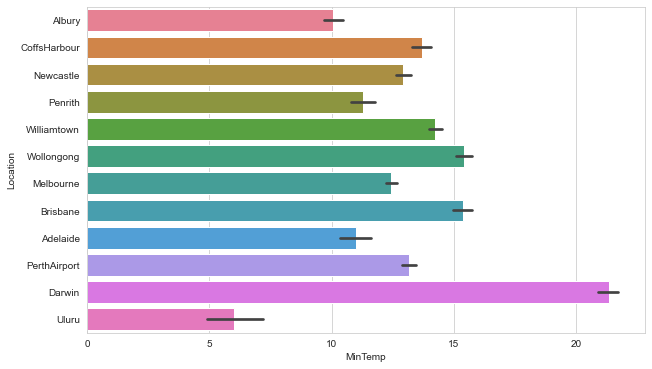

In [166]:
#checking the relationship b/w MinTemp and location
plt.figure(figsize=(10,6))
sns.barplot(x='MinTemp',y='Location',data=df,palette='husl')
plt.show()

Uluru and Alburyhaving the minTemp

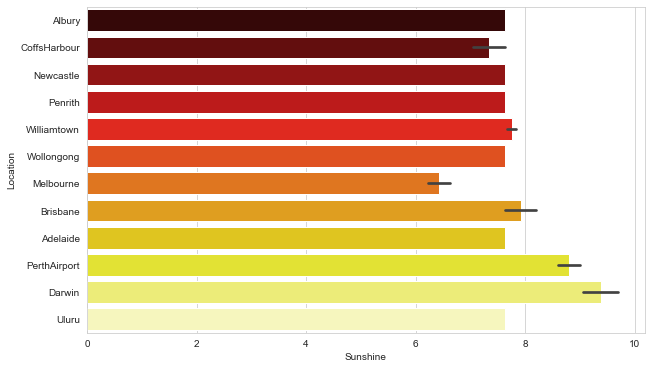

In [169]:
#checking the relationship b/w SUnshin and Location
plt.figure(figsize=(10,6))
sns.barplot(x='Sunshine',y='Location',data=df,palette='hot')
plt.show()

Darwin and PerthAirplot these 2 loaction having more sunline

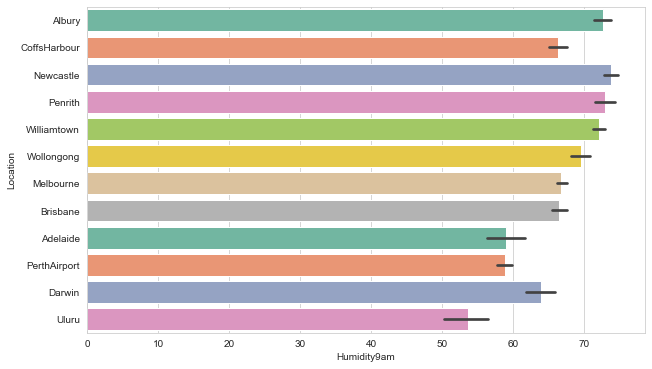

In [170]:

#checking the relationship b/w Humidity9am and Location
plt.figure(figsize=(10,6))
sns.barplot(x='Humidity9am',y='Location',data=df,palette='Set2')
plt.show()

Newcatel and penrith these2 location are having High Humidity AT 9AM

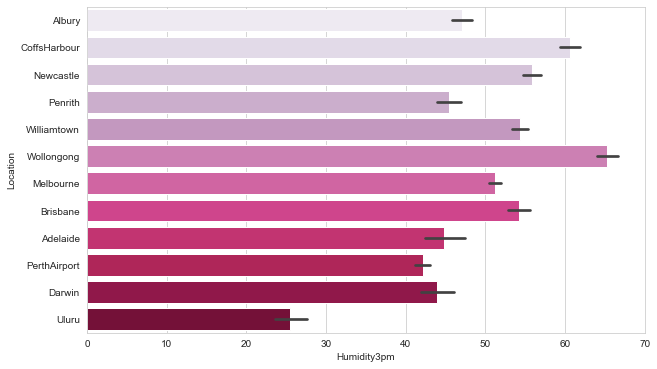

In [171]:
#checking the relationship b/w Humidity3pm and Location
plt.figure(figsize=(10,6))
sns.barplot(x='Humidity3pm',y='Location',data=df,palette='PuRd')
plt.show()

Coffsharbour and wollongong these 2 location are having max humidity at 3 pm

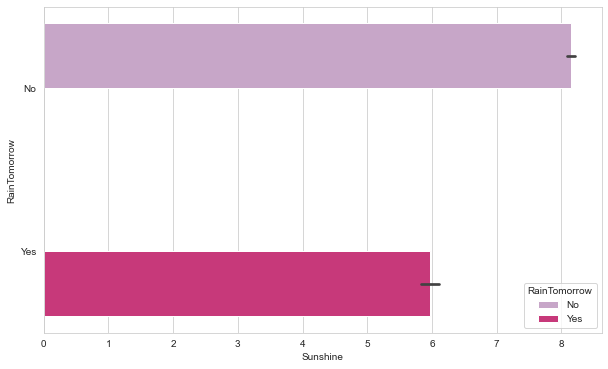

In [179]:
#checking the relationship b/w subshine and raintomorrow
plt.figure(figsize=(10,6))
sns.barplot(x='Sunshine',y='RainTomorrow',hue='RainTomorrow',data=df,palette='PuRd')
plt.show()

when sunshine is high rain will not occur

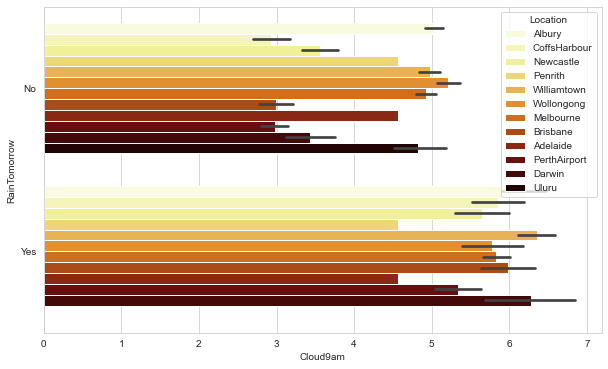

In [187]:

#checking the relationship b/w Cloud9am and RainTomorrow
plt.figure(figsize=(10,6))
sns.barplot(x='Cloud9am',y='RainTomorrow',hue='Location',data=df,palette='afmhot_r')
plt.show()

Rain will occur in Uluru and Melbourne when cloud is high at 9am

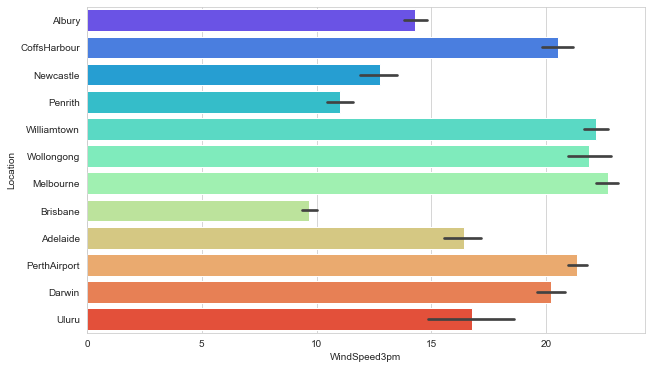

In [190]:
#checking the relationship b/w WindSpeed3pm and Location
plt.figure(figsize=(10,6))
sns.barplot(x='WindSpeed3pm',y='Location',data=df,palette='rainbow')
plt.show()

Melbourne and williamtowm having high windspeed at 3pm

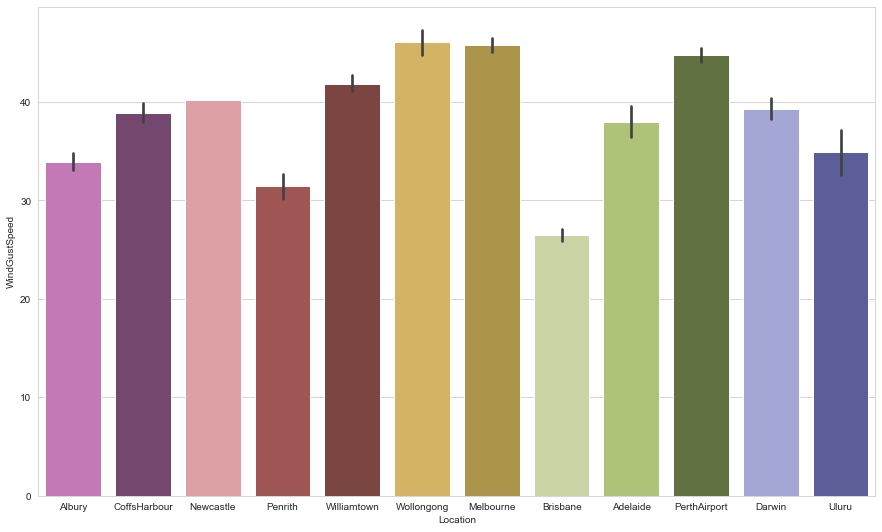

In [198]:
#checking the relationship b/w Location and WindGustSpeed
plt.figure(figsize=(15,9))
sns.barplot(x='Location',y='WindGustSpeed',data=df,palette='tab20b_r')
plt.show()

WindGustSpeed is high in williamtowm and melbourin Location

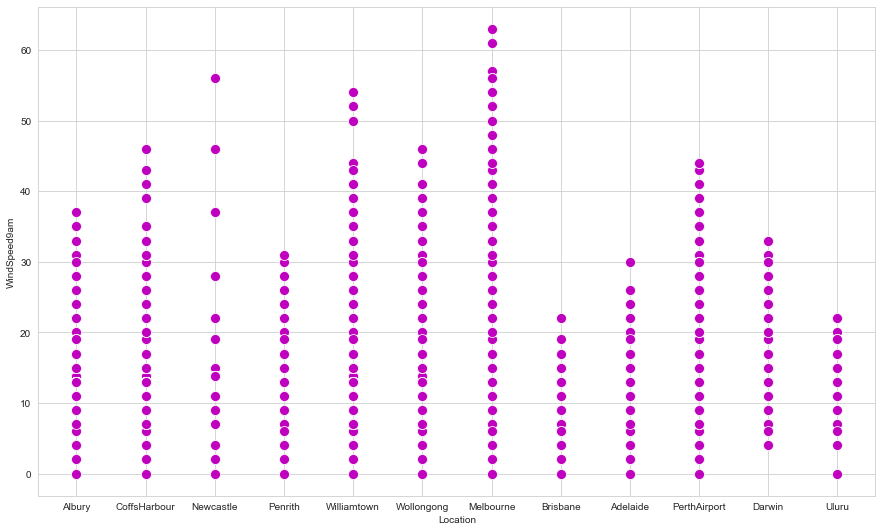

In [205]:
#checking the relationship b/w  Location and  WindSpeed9am
plt.figure(figsize=(15,9))
sns.scatterplot(x='Location',y='WindSpeed9am',data=df,color='m',s=100)
plt.show()

Melbourne  and PethAirport having high wind at 9am

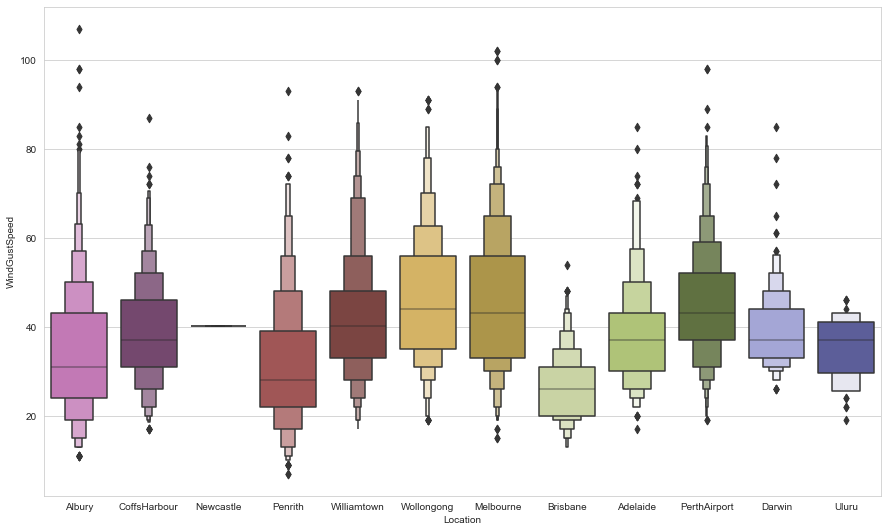

In [208]:
#checking the relationship b/w  Location and WindGustSpeed
plt.figure(figsize=(15,9))
sns.boxenplot(x='Location',y='WindGustSpeed',data=df,palette='tab20b_r')
plt.show()

WindGustSpeed is high in williamtowm and melbourin Location

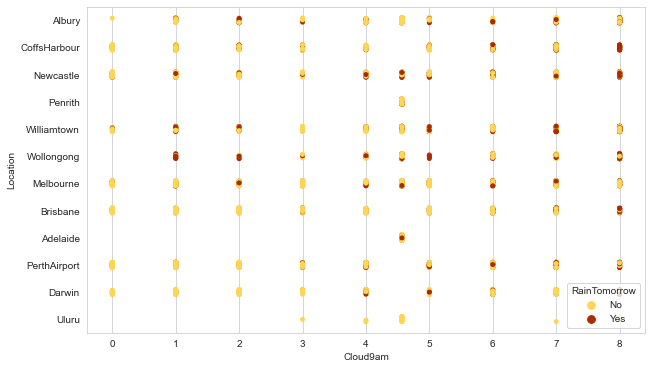

In [218]:

#checking the relationship b/w Cloud9am and Location
plt.figure(figsize=(10,6))
sns.stripplot(x='Cloud9am',y='Location',hue='RainTomorrow',data=df,palette='afmhot_r')
plt.show()

No is more is compare to yes means there is less changes of rain when colud are there at 9am

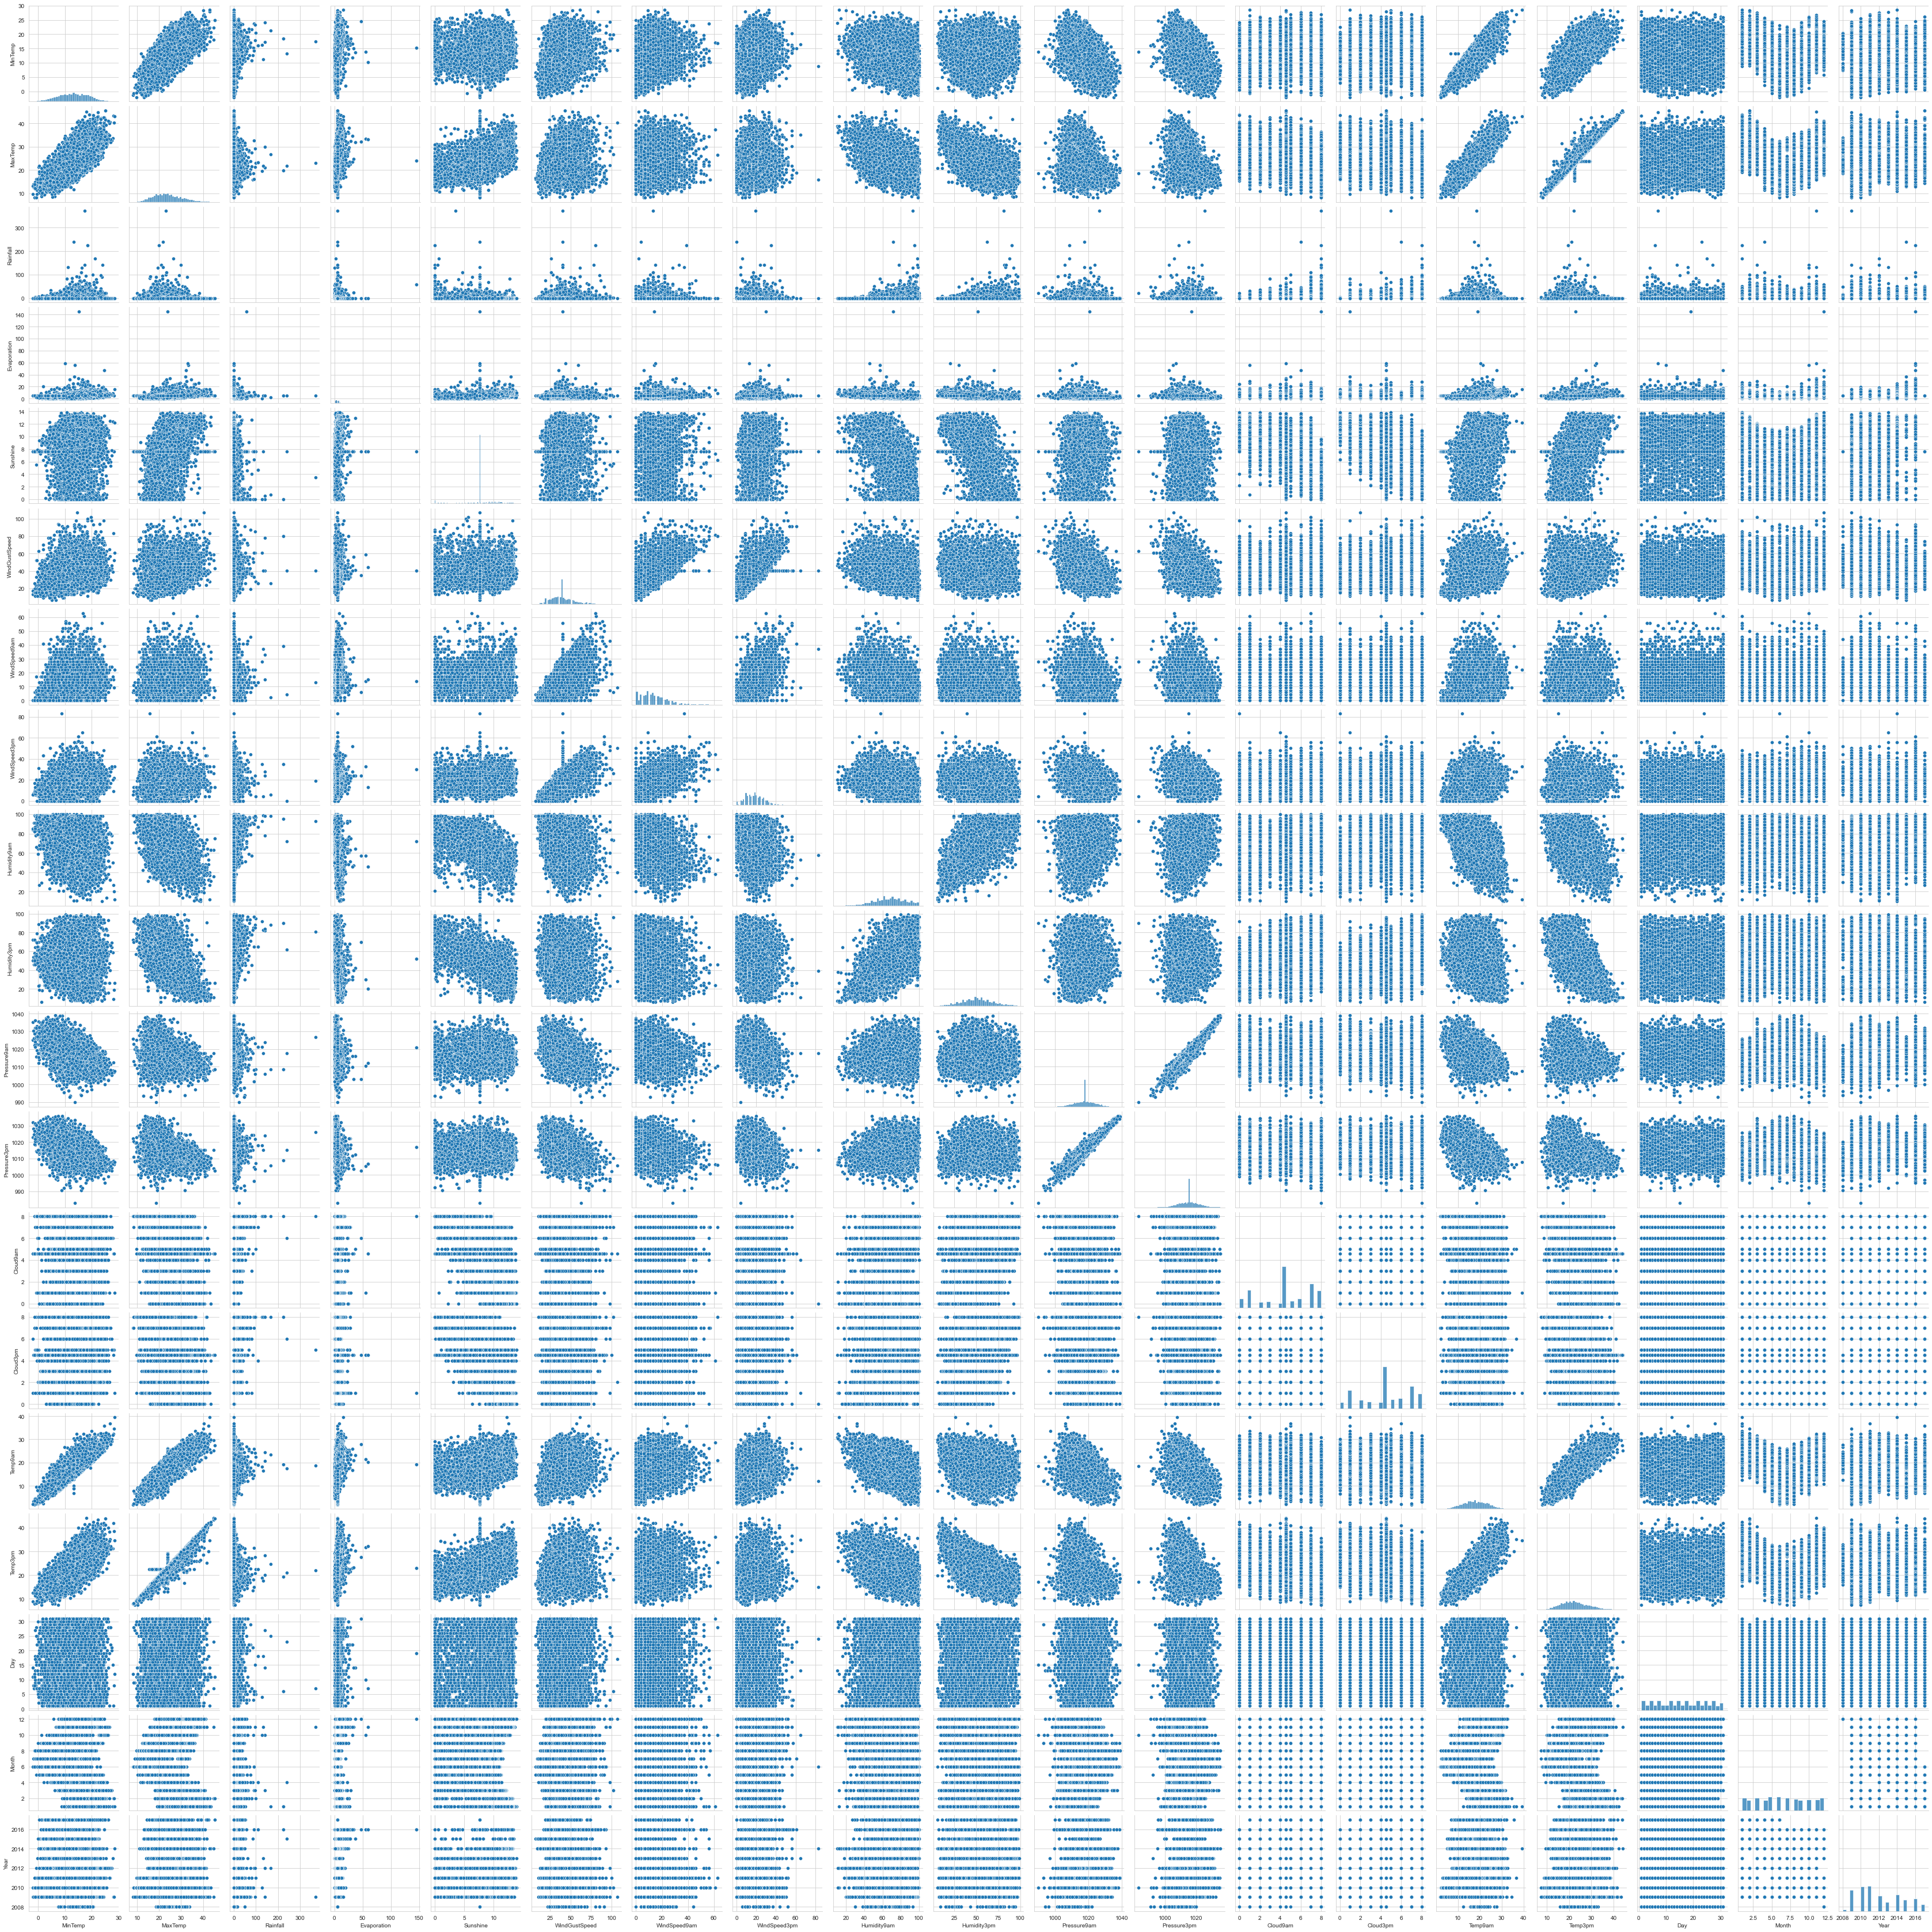

In [219]:
sns.pairplot(df,palette='tab20b_r')

Here we can observe the correlation between the features and on the diagonal we can notice the distribution plot which shows whether the columns has skewness or not.

We can also see the linear relation between the features.

# Label Encoding Categorical data


In [299]:
categorical_col

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [30]:
#encoding the data

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df[categorical_col]=df[categorical_col].apply(le.fit_transform)
df

Location  MinTemp    MaxTemp  Rainfall  Evaporation  Sunshine  \
0            1     13.4  22.900000       0.6     5.389395  7.632205   
1            1      7.4  25.100000       0.0     5.389395  7.632205   
2            1     12.9  25.700000       0.0     5.389395  7.632205   
3            1      9.2  28.000000       0.0     5.389395  7.632205   
4            1     17.5  32.300000       1.0     5.389395  7.632205   
...        ...      ...        ...       ...          ...       ...   
8420         9      2.8  23.400000       0.0     5.389395  7.632205   
8421         9      3.6  25.300000       0.0     5.389395  7.632205   
8422         9      5.4  26.900000       0.0     5.389395  7.632205   
8423         9      7.8  27.000000       0.0     5.389395  7.632205   
8424         9     14.9  23.859976       0.0     5.389395  7.632205   

      WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  ...  Pressure3pm  \
0              13      44.000000          13          14  ...       1007.1   
1              14      44.000000           6          15  ...       1007.8   
2              15      46.000000          13          15  ...       1008.7   
3               4      24.000000           9           0  ...       1012.8   
4              13      41.000000           1           7  ...       1006.0   
...           ...            ...         ...         ...  ...          ...   
8420            0      31.000000           9           1  ...       1020.3   
8421            6      22.000000           9           3  ...       1019.1   
8422            3      37.000000           9          14  ...       1016.8   
8423            9      28.000000          10           3  ...       1016.5   
8424            3      40.174469           2           2  ...       1017.9   

      Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  Day  \
0     8.000000  4.503183     16.9     21.8          0             0    1   
1     4.566622  4.503183     17.2     24.3          0             0    2   
2     4.566622  2.000000     21.0     23.2          0             0    3   
3     4.566622  4.503183     18.1     26.5          0             0    4   
4     7.000000  8.000000     17.8     29.7          0             0    5   
...        ...       ...      ...      ...        ...           ...  ...   
8420  4.566622  4.503183     10.1     22.4          0             0   21   
8421  4.566622  4.503183     10.9     24.5          0             0   22   
8422  4.566622  4.503183     12.5     26.1          0             0   23   
8423  3.000000  2.000000     15.1     26.0          0             0   24   
8424  8.000000  8.000000     15.0     20.9          0             0   25   

      Month  Year  
0        12  2008  
1        12  2008  
2        12  2008  
3        12  2008  
4        12  2008  
...     ...   ...  
8420      6  2017  
8421      6  2017  
8422      6  2017  
8423      6  2017  
8424      6  2017  

[8425 rows x 25 columns]

Now our Data is Encoded

# Outliers


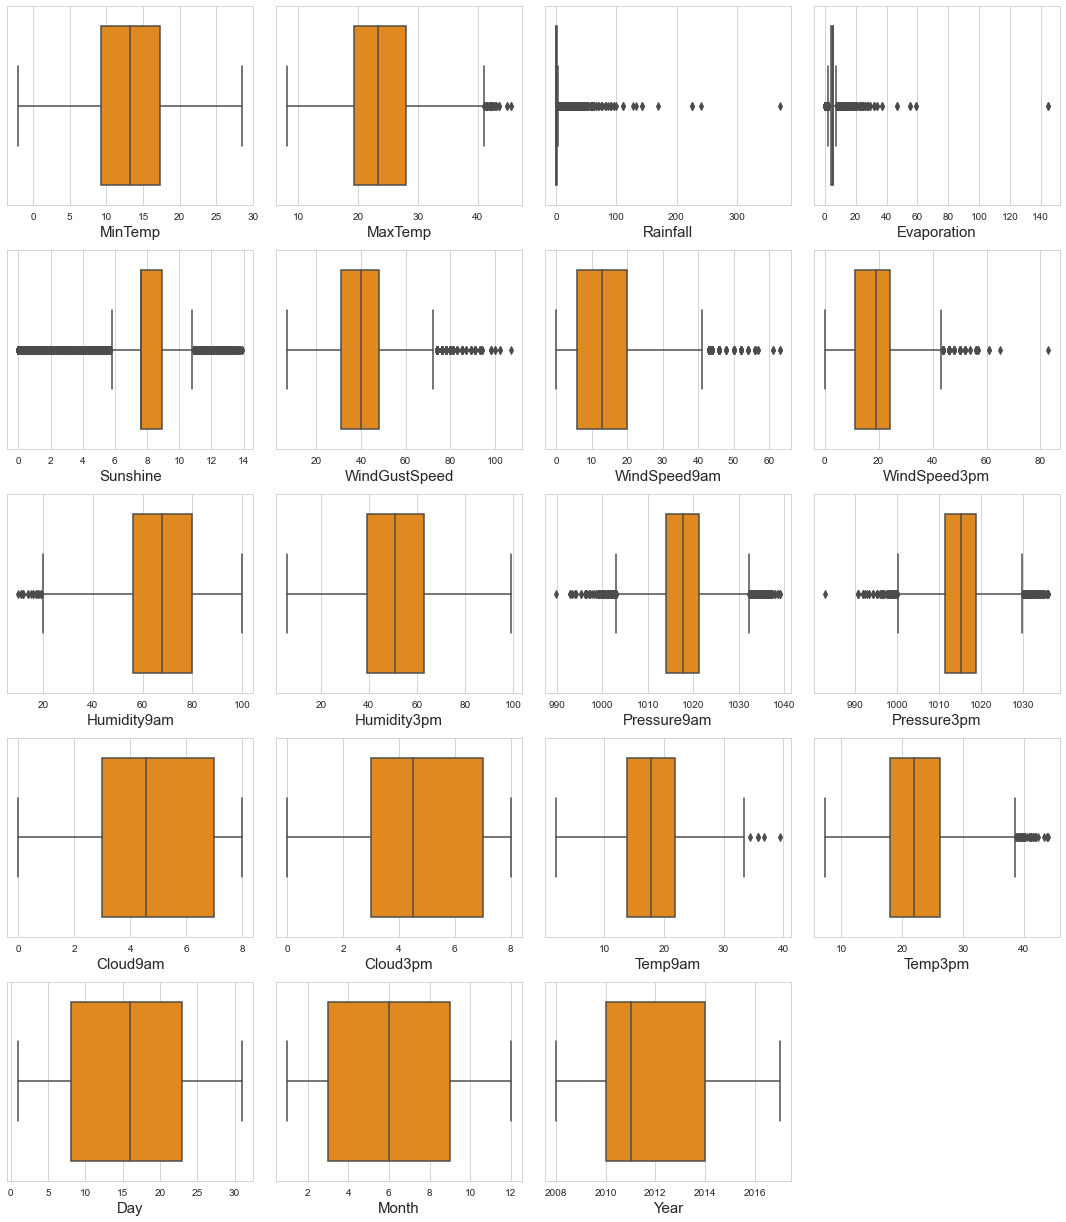

In [31]:
#Identifing the outliers using the boxplot

plt.figure(figsize=(15,20),facecolor="white")
plotnumber=1
for col in numerical_col:
    if plotnumber<=24:
        ax = plt.subplot(6,4,plotnumber)
        sns.boxplot(df[col],color="darkorange")
        plt.xlabel(col,fontsize=15)
    plotnumber+=1
plt.tight_layout() 


The outliers are present in the columns.

We need to remove the outliers from the zscore method

# Removing Outliers

# Zscore Method

In [32]:
from scipy.stats import zscore

z=np.abs(zscore(df))
z

array([[1.51577598e+00, 3.84250100e-02, 1.57008852e-01, ...,
        1.67773291e+00, 1.61669646e+00, 1.65889601e+00],
       [1.51577598e+00, 1.07698898e+00, 2.02812062e-01, ...,
        1.56392626e+00, 1.61669646e+00, 1.65889601e+00],
       [1.51577598e+00, 5.45261556e-02, 3.00945038e-01, ...,
        1.45011961e+00, 1.61669646e+00, 1.65889601e+00],
       ...,
       [1.01389522e+00, 1.44879364e+00, 4.97210991e-01, ...,
        8.26013396e-01, 1.28610663e-01, 1.98042320e+00],
       [1.01389522e+00, 1.00262804e+00, 5.13566487e-01, ...,
        9.39820046e-01, 1.28610663e-01, 1.98042320e+00],
       [1.01389522e+00, 3.17278507e-01, 2.90531973e-15, ...,
        1.05362670e+00, 1.28610663e-01, 1.98042320e+00]])

In [33]:
theshold=3
new_df=df[(z<3).all(axis=1)]
new_df

Location  MinTemp    MaxTemp  Rainfall  Evaporation  Sunshine  \
0            1     13.4  22.900000       0.6     5.389395  7.632205   
1            1      7.4  25.100000       0.0     5.389395  7.632205   
2            1     12.9  25.700000       0.0     5.389395  7.632205   
3            1      9.2  28.000000       0.0     5.389395  7.632205   
4            1     17.5  32.300000       1.0     5.389395  7.632205   
...        ...      ...        ...       ...          ...       ...   
8420         9      2.8  23.400000       0.0     5.389395  7.632205   
8421         9      3.6  25.300000       0.0     5.389395  7.632205   
8422         9      5.4  26.900000       0.0     5.389395  7.632205   
8423         9      7.8  27.000000       0.0     5.389395  7.632205   
8424         9     14.9  23.859976       0.0     5.389395  7.632205   

      WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  ...  Pressure3pm  \
0              13      44.000000          13          14  ...       1007.1   
1              14      44.000000           6          15  ...       1007.8   
2              15      46.000000          13          15  ...       1008.7   
3               4      24.000000           9           0  ...       1012.8   
4              13      41.000000           1           7  ...       1006.0   
...           ...            ...         ...         ...  ...          ...   
8420            0      31.000000           9           1  ...       1020.3   
8421            6      22.000000           9           3  ...       1019.1   
8422            3      37.000000           9          14  ...       1016.8   
8423            9      28.000000          10           3  ...       1016.5   
8424            3      40.174469           2           2  ...       1017.9   

      Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  Day  \
0     8.000000  4.503183     16.9     21.8          0             0    1   
1     4.566622  4.503183     17.2     24.3          0             0    2   
2     4.566622  2.000000     21.0     23.2          0             0    3   
3     4.566622  4.503183     18.1     26.5          0             0    4   
4     7.000000  8.000000     17.8     29.7          0             0    5   
...        ...       ...      ...      ...        ...           ...  ...   
8420  4.566622  4.503183     10.1     22.4          0             0   21   
8421  4.566622  4.503183     10.9     24.5          0             0   22   
8422  4.566622  4.503183     12.5     26.1          0             0   23   
8423  3.000000  2.000000     15.1     26.0          0             0   24   
8424  8.000000  8.000000     15.0     20.9          0             0   25   

      Month  Year  
0        12  2008  
1        12  2008  
2        12  2008  
3        12  2008  
4        12  2008  
...     ...   ...  
8420      6  2017  
8421      6  2017  
8422      6  2017  
8423      6  2017  
8424      6  2017  

[7987 rows x 25 columns]

The outliers are removed



In [34]:
#checking the dimension of both dataframe
print(df.shape)
print(new_df.shape)

(8425, 25)
(7987, 25)


In [35]:
#Checking the data loss
loss=(8425/7987)/8425*100
loss

0.0125203455615375

Here we are losing very less data. 

# Checking Skewness


In [36]:
new_df.corr()

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
Location       1.000000  0.116694  0.063798  0.022192     0.132245  0.048579   
MinTemp        0.116694  1.000000  0.718598  0.093118     0.372576  0.065682   
MaxTemp        0.063798  0.718598  1.000000 -0.138415     0.468786  0.387050   
Rainfall       0.022192  0.093118 -0.138415  1.000000    -0.095749 -0.166857   
Evaporation    0.132245  0.372576  0.468786 -0.095749     1.000000  0.369080   
Sunshine       0.048579  0.065682  0.387050 -0.166857     0.369080  1.000000   
WindGustDir   -0.037707 -0.154935 -0.237955  0.084866    -0.121384 -0.104739   
WindGustSpeed  0.245658  0.231097  0.136337  0.093945     0.200769  0.009797   
WindDir9am    -0.041030 -0.045231 -0.217160  0.123473    -0.115309 -0.076595   
WindDir3pm    -0.031195 -0.154184 -0.190417  0.075682    -0.036752 -0.069789   
WindSpeed9am   0.238424  0.144125  0.012153  0.056601     0.140171 -0.004618   
WindSpeed3pm   0.231939  0.185976  0.093241  0.038229     0.105313  0.046531   
Humidity9am    0.003725 -0.126383 -0.382687  0.297041    -0.325325 -0.366337   
Humidity3pm    0.059978  0.090208 -0.409560  0.290501    -0.231465 -0.437504   
Pressure9am   -0.024265 -0.433113 -0.333569 -0.105009    -0.262043 -0.004078   
Pressure3pm   -0.012288 -0.427936 -0.414358 -0.043905    -0.275720 -0.063832   
Cloud9am       0.041859  0.089354 -0.252579  0.224696    -0.116113 -0.527350   
Cloud3pm       0.027050  0.036649 -0.248268  0.188755    -0.146421 -0.541996   
Temp9am        0.118100  0.888690  0.864864 -0.033343     0.439628  0.261680   
Temp3pm        0.060707  0.687570  0.974957 -0.146935     0.454352  0.403489   
RainToday      0.002934  0.061728 -0.219747  0.689452    -0.163847 -0.219089   
RainTomorrow   0.009222  0.091021 -0.149708  0.270580    -0.089365 -0.317675   
Day           -0.004978  0.010924  0.017068 -0.015131     0.011560  0.003451   
Month         -0.086011 -0.247066 -0.164351  0.001459    -0.055232 -0.000727   
Year           0.481143  0.040001  0.120204  0.010239     0.124246  0.054960   

               WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  ...  \
Location         -0.037707       0.245658   -0.041030   -0.031195  ...   
MinTemp          -0.154935       0.231097   -0.045231   -0.154184  ...   
MaxTemp          -0.237955       0.136337   -0.217160   -0.190417  ...   
Rainfall          0.084866       0.093945    0.123473    0.075682  ...   
Evaporation      -0.121384       0.200769   -0.115309   -0.036752  ...   
Sunshine         -0.104739       0.009797   -0.076595   -0.069789  ...   
WindGustDir       1.000000       0.005465    0.405681    0.507292  ...   
WindGustSpeed     0.005465       1.000000   -0.069460    0.076737  ...   
WindDir9am        0.405681      -0.069460    1.000000    0.243622  ...   
WindDir3pm        0.507292       0.076737    0.243622    1.000000  ...   
WindSpeed9am      0.048025       0.577553    0.081838    0.040160  ...   
WindSpeed3pm      0.108357       0.628452    0.058887    0.079716  ...   
Humidity9am       0.031081      -0.263933    0.009571   -0.007820  ...   
Humidity3pm       0.051061      -0.085009    0.117910   -0.009385  ...   
Pressure9am      -0.095047      -0.377284   -0.003943   -0.129842  ...   
Pressure3pm      -0.008263      -0.336132    0.081400   -0.037280  ...   
Cloud9am          0.123415       0.013678    0.092396    0.073742  ...   
Cloud3pm          0.093527       0.064375    0.062637    0.054321  ...   
Temp9am          -0.185080       0.198936   -0.101576   -0.172000  ...   
Temp3pm          -0.249791       0.101786   -0.224390   -0.202000  ...   
RainToday         0.121709       0.076677    0.149239    0.100983  ...   
RainTomorrow      0.044378       0.181478    0.027091    0.003674  ...   
Day               0.017003      -0.005232   -0.010014   -0.000714  ...   
Month             0.038044       0.045638    0.018344    0.028629  ...   
Year             -0.096042      -0.035546   -0.034468   -0.010781  ...   

         

<AxesSubplot:>

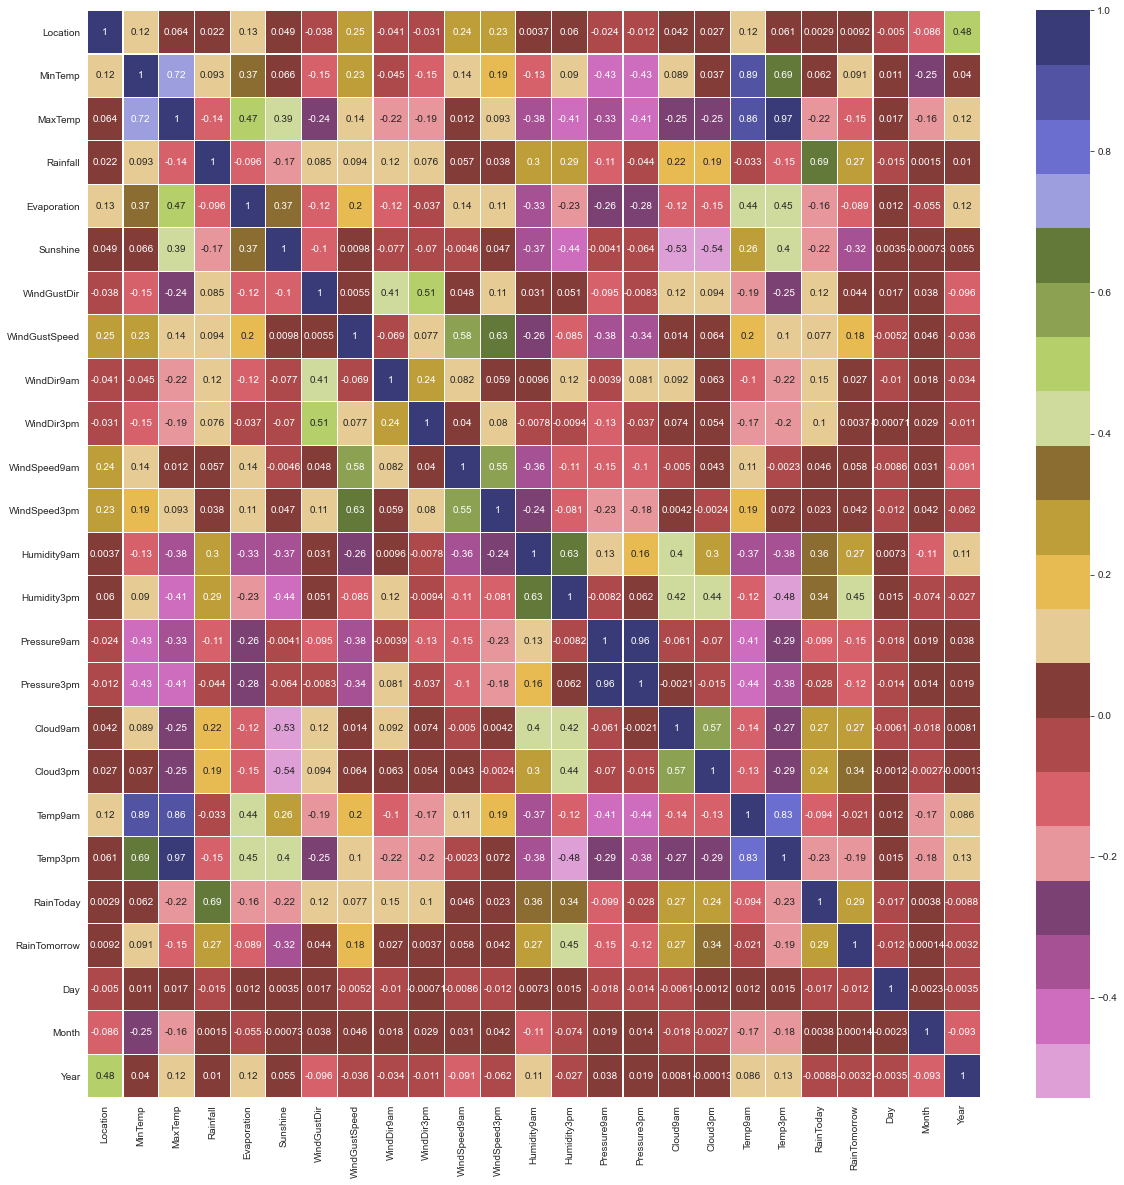

In [37]:
#heatmap for correlation
plt.figure(figsize=(20,20))
sns.heatmap(new_df.corr(),annot=True,cmap='tab20b_r',linewidths=0.1)

This heatmap shows the correaltion matrix by visualizing the data. We can observe the relation between one feature to other.

This heatmap contain both positive and negative correlation.



# Visualizing the correlation between features and label using bar plot.


<function matplotlib.pyplot.show(close=None, block=None)>

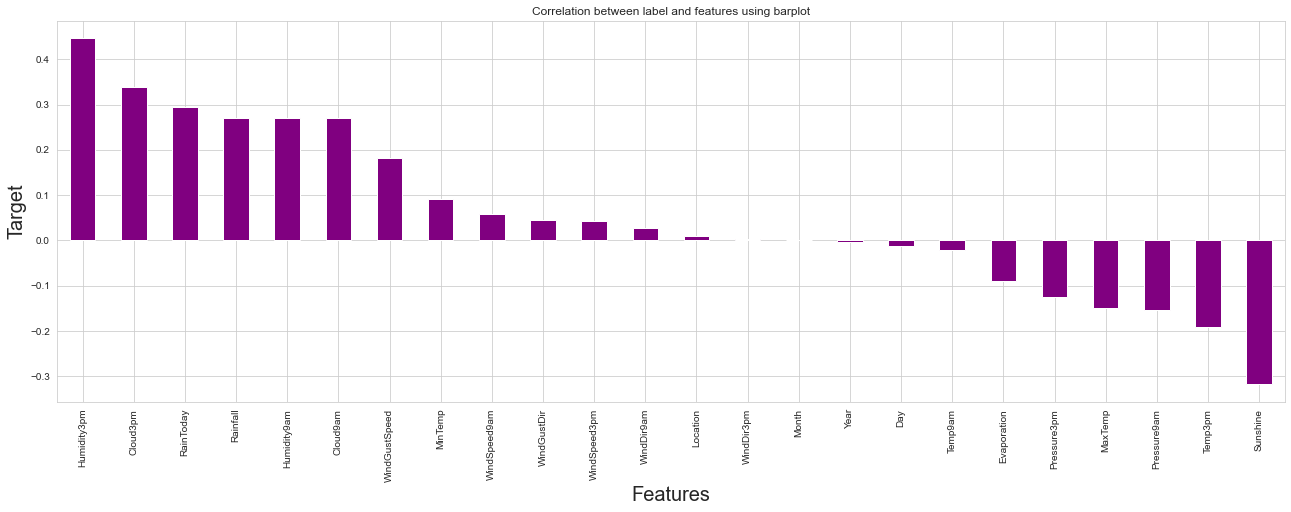

In [38]:
plt.figure(figsize=(22,7))
new_df.corr()['RainTomorrow'].sort_values(ascending=False).drop(['RainTomorrow']).plot(kind="bar",color="purple")
plt.xlabel('Features',fontsize=20)
plt.ylabel('Target',fontsize=20)
plt.title('Correlation between label and features using barplot')
plt.show

The features Location,WindDir3pm,Month,Year have very less correlation with the label so we can drop these columns.



# Separating features and label

In [37]:
x=new_df.drop('RainTomorrow',axis=1)
y=new_df['RainTomorrow']

In [38]:
x.shape

(7987, 24)

In [39]:
y.shape

(7987,)

# Checking the Multicolinearity

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns
vif

VIF values       Features
0        5.026773       Location
1       59.595186        MinTemp
2      440.580724        MaxTemp
3        2.281529       Rainfall
4        9.133535    Evaporation
5       16.480548       Sunshine
6        5.361233    WindGustDir
7       24.151795  WindGustSpeed
8        4.733198     WindDir9am
9        6.113206     WindDir3pm
10       6.028294   WindSpeed9am
11       9.488856   WindSpeed3pm
12      70.036030    Humidity9am
13      48.474613    Humidity3pm
14  576458.972087    Pressure9am
15  558702.402033    Pressure3pm
16       8.631796       Cloud9am
17       8.645146       Cloud3pm
18     193.233734        Temp9am
19     522.842185        Temp3pm
20       2.765390      RainToday
21       4.205295            Day
22       5.222528          Month
23   44787.173775           Year

Dropping the highest VIF value to solve the Multicolinearity problem.

In [41]:
x.drop('Pressure9am',axis=1,inplace=True)

In [42]:
#Again checking the VIF Values

In [43]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns
vif

VIF values       Features
0       5.026300       Location
1      58.668761        MinTemp
2     440.492961        MaxTemp
3       2.276980       Rainfall
4       9.027511    Evaporation
5      16.441843       Sunshine
6       5.323815    WindGustDir
7      24.024894  WindGustSpeed
8       4.666065     WindDir9am
9       5.840121     WindDir3pm
10      6.026925   WindSpeed9am
11      9.447753   WindSpeed3pm
12     69.622247    Humidity9am
13     47.781590    Humidity3pm
14  41434.410903    Pressure3pm
15      8.631390       Cloud9am
16      8.642287       Cloud3pm
17    191.074436        Temp9am
18    507.776267        Temp3pm
19      2.759725      RainToday
20      4.201768            Day
21      5.212259          Month
22  43170.504006           Year

Again Dropping the highest VIF value to solve the Multicolinearity problem.

In [44]:
x.drop('Pressure3pm',axis=1,inplace=True)

In [45]:
#Again checking the Multiconlinearity

In [46]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns
vif

VIF values       Features
0     5.021824       Location
1    58.668682        MinTemp
2   438.734185        MaxTemp
3     2.276976       Rainfall
4     8.944626    Evaporation
5    16.401545       Sunshine
6     5.302227    WindGustDir
7    22.508393  WindGustSpeed
8     4.663067     WindDir9am
9     5.810805     WindDir3pm
10    5.983995   WindSpeed9am
11    9.419493   WindSpeed3pm
12   69.526521    Humidity9am
13   47.781557    Humidity3pm
14    8.630570       Cloud9am
15    8.637225       Cloud3pm
16  190.186423        Temp9am
17  507.760026        Temp3pm
18    2.756194      RainToday
19    4.201637            Day
20    5.198266          Month
21  179.728996           Year

Again Dropping the highest VIF value to solve the Multicolinearity problem.

In [47]:
x.drop('Temp3pm',axis=1,inplace=True)

In [48]:
#checking the vif
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns
vif

VIF values       Features
0     5.016681       Location
1    58.557002        MinTemp
2   152.330909        MaxTemp
3     2.276091       Rainfall
4     8.944614    Evaporation
5    16.401351       Sunshine
6     5.281508    WindGustDir
7    22.320461  WindGustSpeed
8     4.652243     WindDir9am
9     5.786991     WindDir3pm
10    5.982056   WindSpeed9am
11    9.393821   WindSpeed3pm
12   61.683807    Humidity9am
13   32.585903    Humidity3pm
14    8.625110       Cloud9am
15    8.582114       Cloud3pm
16  176.527253        Temp9am
17    2.752125      RainToday
18    4.200487            Day
19    5.136113          Month
20  166.377829           Year

In [49]:
#Dropping the column
x.drop('Temp9am',axis=1,inplace=True)

In [50]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns
vif

VIF values       Features
0     4.950108       Location
1    30.681835        MinTemp
2    88.104741        MaxTemp
3     2.274766       Rainfall
4     8.931569    Evaporation
5    16.351340       Sunshine
6     5.278342    WindGustDir
7    21.997034  WindGustSpeed
8     4.651881     WindDir9am
9     5.786804     WindDir3pm
10    5.879946   WindSpeed9am
11    9.191523   WindSpeed3pm
12   43.927131    Humidity9am
13   26.081442    Humidity3pm
14    8.528194       Cloud9am
15    8.569618       Cloud3pm
16    2.749594      RainToday
17    4.199719            Day
18    5.079556          Month
19  162.862374           Year

we Reduce the Multicolinearty problem we can not drop many columns if we do so then our important
information will be loss from dataset

# Checking for Skewness

In [51]:
x.skew()

Location        -0.040284
MinTemp         -0.084549
MaxTemp          0.314510
Rainfall         3.488446
Evaporation      0.846181
Sunshine        -0.723970
WindGustDir      0.112339
WindGustSpeed    0.506897
WindDir9am       0.160081
WindDir3pm      -0.126255
WindSpeed9am     0.711395
WindSpeed3pm     0.300109
Humidity9am     -0.231656
Humidity3pm      0.125150
Cloud9am        -0.356892
Cloud3pm        -0.266829
RainToday        1.301170
Day              0.002731
Month            0.054460
Year             0.430100
dtype: float64

skewness is present 

# Removing the Skewness

In [52]:
from sklearn.preprocessing import power_transform


In [53]:
#removing the skewness
x=power_transform(x,method='yeo-johnson')
x

array([[-1.56842088e+00,  6.05015740e-02, -7.57272296e-02, ...,
        -1.88561220e+00,  1.52402297e+00, -2.43360887e-13],
       [-1.56842088e+00, -1.05725282e+00,  2.87144714e-01, ...,
        -1.70313123e+00,  1.52402297e+00, -2.43360887e-13],
       [-1.56842088e+00, -3.22219600e-02,  3.82999789e-01, ...,
        -1.53666415e+00,  1.52402297e+00, -2.43360887e-13],
       ...,
       [ 1.01632853e+00, -1.43299533e+00,  5.71022930e-01, ...,
         8.36217054e-01, -4.67179920e-02,  2.91655589e-13],
       [ 1.01632853e+00, -9.82333711e-01,  5.86477671e-01, ...,
         9.34619493e-01, -4.67179920e-02,  2.91655589e-13],
       [ 1.01632853e+00,  3.38295674e-01,  8.49017248e-02, ...,
         1.03196621e+00, -4.67179920e-02,  2.91655589e-13]])

# Feature Scaling using Standard Scalarization


In [54]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)
x


array([[-1.56842088,  0.06050157, -0.07572723, ..., -1.8856122 ,
         1.52402297, -1.66757678],
       [-1.56842088, -1.05725282,  0.28714471, ..., -1.70313123,
         1.52402297, -1.66757678],
       [-1.56842088, -0.03222196,  0.38299979, ..., -1.53666415,
         1.52402297, -1.66757678],
       ...,
       [ 1.01632853, -1.43299533,  0.57102293, ...,  0.83621705,
        -0.04671799,  1.99906255],
       [ 1.01632853, -0.98233371,  0.58647767, ...,  0.93461949,
        -0.04671799,  1.99906255],
       [ 1.01632853,  0.33829567,  0.08490172, ...,  1.03196621,
        -0.04671799,  1.99906255]])

Now our data is balanced

# oversampling

In [55]:
# Balancing the Data 
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x,y=sm.fit_resample(x,y)

In [56]:
#checking the value count
y.value_counts()

0    6165
1    6165
Name: RainTomorrow, dtype: int64

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

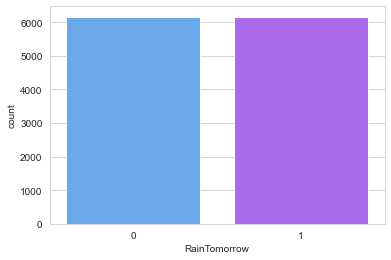

In [57]:
# Visualizing the data after oversampling
sns.countplot(y,palette="cool")

# Modeling
Finding the best random state

In [58]:
maxAcc=0
maxRs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    rf=RandomForestClassifier()
    rf.fit(x_train,y_train)
    pred=rf.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i
print("Best accuracy is ",maxAcc,"at random state",maxRs)


Best accuracy is  0.939713436063801 at random state 160


# Creating train test split

In [59]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxRs)

# LogisticRegression

In [60]:
# Checking accuracy for LogisticRegression
lr= LogisticRegression()
lr.fit(x_train,y_train)
pred =lr.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.7750743444174101
[[1459  402]
 [ 430 1408]]
              precision    recall  f1-score   support

           0       0.77      0.78      0.78      1861
           1       0.78      0.77      0.77      1838

    accuracy                           0.78      3699
   macro avg       0.78      0.78      0.78      3699
weighted avg       0.78      0.78      0.78      3699



# RandomForestClassifier

In [61]:
# Checking accuracy for RandomForestClassifier
rf= RandomForestClassifier()
rf.fit(x_train,y_train)
pred = rf.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.9367396593673966
[[1739  122]
 [ 112 1726]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      1861
           1       0.93      0.94      0.94      1838

    accuracy                           0.94      3699
   macro avg       0.94      0.94      0.94      3699
weighted avg       0.94      0.94      0.94      3699



# DecisionTreeClassifier

In [62]:
# Checking accuracy for DecisionTree classifier
dc= DecisionTreeClassifier()
dc.fit(x_train,y_train)
pred = dc.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.8751013787510138
[[1630  231]
 [ 231 1607]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      1861
           1       0.87      0.87      0.87      1838

    accuracy                           0.88      3699
   macro avg       0.88      0.88      0.88      3699
weighted avg       0.88      0.88      0.88      3699



# Support Vector Machine Classifier

In [63]:
# Checking accuracy for SVC
svc= SVC()
svc.fit(x_train,y_train)
pred = svc.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.8510408218437415
[[1559  302]
 [ 249 1589]]
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1861
           1       0.84      0.86      0.85      1838

    accuracy                           0.85      3699
   macro avg       0.85      0.85      0.85      3699
weighted avg       0.85      0.85      0.85      3699



# GradientBoostingClassifier

In [64]:
# Checking accuracy for GradientBoosting classifier
gb= GradientBoostingClassifier()
gb.fit(x_train,y_train)
pred = gb.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.8559070018924033
[[1608  253]
 [ 280 1558]]
              precision    recall  f1-score   support

           0       0.85      0.86      0.86      1861
           1       0.86      0.85      0.85      1838

    accuracy                           0.86      3699
   macro avg       0.86      0.86      0.86      3699
weighted avg       0.86      0.86      0.86      3699



# ExtraTreesClassifier

In [65]:
# Checking accuracy for Extratree classifier
et= ExtraTreesClassifier()
et.fit(x_train,y_train)
pred = et.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))


0.9526899161935658
[[1746  115]
 [  60 1778]]
              precision    recall  f1-score   support

           0       0.97      0.94      0.95      1861
           1       0.94      0.97      0.95      1838

    accuracy                           0.95      3699
   macro avg       0.95      0.95      0.95      3699
weighted avg       0.95      0.95      0.95      3699



# Cross Validation Score

In [66]:
# Checking cross valiodation score for LogisticRegression
from sklearn.model_selection import cross_val_score
print('cross_validation_score',cross_val_score(lr,x,y,cv=10).mean())

cross_validation_score 0.729521492295215


In [67]:
# Checking cross valiodation score for RandomForest

print('cross_validation_score',cross_val_score(rf,x,y,cv=10).mean())

cross_validation_score 0.8730738037307381


In [68]:
# Checking cross valiodation score for DecisionTree

print('cross validation score',cross_val_score(dc,x,y,cv=10).mean())

cross validation score 0.7941605839416057


In [69]:
# Checking cross valiodation score for GradientBoost

print('cross validation score',cross_val_score(gb,x,y,cv=10).mean())

cross validation score 0.7500405515004055


In [70]:
# Checking cross valiodation score for svc

print('cross validation score',cross_val_score(svc,x,y,cv=10).mean())

cross validation score 0.7802919708029197


In [71]:
# Checking cross valiodation score for ExtraTreeclassifier

print('cross validation score',cross_val_score(et,x,y,cv=13).mean())

cross validation score 0.9172108941953283


Extra Trees Classifier model have highest accuracy i.e. 94.16% with 91.72% cross validation score which is good and the difference is less.

# Hyperparameter Tuning

In [115]:
# Extra Trees Classifier
from sklearn.model_selection import GridSearchCV

parameters = {'criterion':['gini','entrophy'],
             'max_depth':[0,10,20],
             'n_jobs':[-2,-1,1],
             'n_estimators':[50,100,200]}

In [116]:
gcv=GridSearchCV(ExtraTreesClassifier(),parameters,cv=5)

In [117]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entrophy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200],
                         'n_jobs': [-2, -1, 1]})

In [118]:
gcv.best_params_

{'criterion': 'gini', 'max_depth': 20, 'n_estimators': 200, 'n_jobs': 1}

In [123]:
Final_model = ExtraTreesClassifier(criterion='gini',max_depth=20,n_estimators=200,n_jobs=1)
Final_model.fit(x_train,y_train)
pred = Final_model.predict(x_test)
acc = accuracy_score(y_test,pred)
print(acc*100)

95.02568261692349


After tuning the model we are getting 95.02% accuracy

# Plotting ROC and compare AUC for all the models used

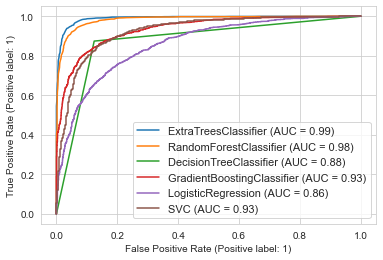

In [124]:
#plotting for all the model 
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(et,x_test,y_test)     # ax_=Axes with confusion matrix
plot_roc_curve(rf, x_test, y_test, ax=disp.ax_)
plot_roc_curve(dc, x_test, y_test, ax=disp.ax_)
plot_roc_curve(gb, x_test, y_test, ax=disp.ax_)
plot_roc_curve(lr, x_test, y_test, ax=disp.ax_)
plot_roc_curve(svc, x_test, y_test, ax=disp.ax_)

plt.legend(prop={'size':11}, loc='lower right')
plt.show()

Here we can see the Area under curve for each model used here.

# Plotting ROC and compare AUC for best model

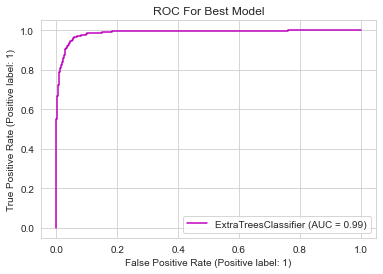

In [126]:
# Lets check the AUC for best model
plot_roc_curve(Final_model,x_test,y_test,color='m')
plt.title('ROC For Best Model')
plt.show()

Here we have plotted the ROC curve for the final model and the AUC value for the best model is 99%

# Saving the Model

In [127]:
#saving the Model
joblib.dump(Final_model,'Rainfall_prediction_classification.pkl')

['Rainfall_prediction_classification.pkl']

# Predicting the saved model

In [128]:
#lets load the saved model and get predictions
model=joblib.load('Rainfall_prediction_classification.pkl')

#prediction
prediction=model.predict(x_test)
prediction

array([1, 1, 1, ..., 1, 1, 0])

In [129]:
a = np.array(y_test)
df = pd.DataFrame()
df['Predicted'] = prediction
df['Original'] = a
df

Predicted  Original
0             1         1
1             1         0
2             1         1
3             0         0
4             1         1
...         ...       ...
3694          0         0
3695          0         0
3696          1         1
3697          1         1
3698          0         0

[3699 rows x 2 columns]

# Regression problem

# Separating features and label

In [130]:
X=new_df.drop('Rainfall',axis=1)
Y=new_df['Rainfall']

In [131]:
X.shape

(7987, 24)

In [132]:
Y.shape

(7987,)

# Checking the Multicolinearity

In [133]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X.values,i)
              for i in range(len(X.columns))]
vif["Features"] = X.columns
vif

VIF values       Features
0        5.050227       Location
1       59.704536        MinTemp
2      440.649457        MaxTemp
3        9.133918    Evaporation
4       16.634484       Sunshine
5        5.366932    WindGustDir
6       24.947611  WindGustSpeed
7        4.728137     WindDir9am
8        6.118678     WindDir3pm
9        6.022052   WindSpeed9am
10       9.512819   WindSpeed3pm
11      69.739072    Humidity9am
12      50.644566    Humidity3pm
13  576823.242242    Pressure9am
14  560697.434357    Pressure3pm
15       8.629473       Cloud9am
16       8.709117       Cloud3pm
17     193.201219        Temp9am
18     522.470702        Temp3pm
19       1.770495      RainToday
20       1.870534   RainTomorrow
21       4.206878            Day
22       5.219158          Month
23   44993.182681           Year

Dropping the highest VIF value to solve the Multicolinearity problem

In [134]:
X.drop('Pressure9am',axis=1,inplace=True)

In [135]:
#again checking the vif 
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X.values,i)
              for i in range(len(X.columns))]
vif["Features"] = X.columns
vif

VIF values       Features
0       5.050054       Location
1      58.815255        MinTemp
2     440.557786        MaxTemp
3       9.026313    Evaporation
4      16.588503       Sunshine
5       5.328358    WindGustDir
6      24.777081  WindGustSpeed
7       4.659477     WindDir9am
8       5.849061     WindDir3pm
9       6.021077   WindSpeed9am
10      9.476053   WindSpeed3pm
11     69.293334    Humidity9am
12     50.084352    Humidity3pm
13  41757.544117    Pressure3pm
14      8.629140       Cloud9am
15      8.704738       Cloud3pm
16    191.020647        Temp9am
17    507.666424        Temp3pm
18      1.753612      RainToday
19      1.865626   RainTomorrow
20      4.203702            Day
21      5.209772          Month
22  43438.650580           Year

Dropping the highest VIF value to solve the Multicolinearity problem

In [136]:
X.drop('Pressure3pm',axis=1,inplace=True)

In [137]:
#checking the vif
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X.values,i)
              for i in range(len(X.columns))]
vif["Features"] = X.columns
vif

VIF values       Features
0     5.043615       Location
1    58.814640        MinTemp
2   438.923501        MaxTemp
3     8.944693    Evaporation
4    16.560967       Sunshine
5     5.308679    WindGustDir
6    23.459314  WindGustSpeed
7     4.656672     WindDir9am
8     5.816800     WindDir3pm
9     5.977122   WindSpeed9am
10    9.452903   WindSpeed3pm
11   69.196283    Humidity9am
12   50.064878    Humidity3pm
13    8.628306       Cloud9am
14    8.702349       Cloud3pm
15  190.125132        Temp9am
16  507.643190        Temp3pm
17    1.751593      RainToday
18    1.851186   RainTomorrow
19    4.203463            Day
20    5.196575          Month
21  181.449391           Year

Multicolinerity still not solve we have drop the high vif values

In [138]:
#Dropping the column
X.drop('Temp3pm',axis=1,inplace=True)

In [139]:
#checking the VIF Again
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X.values,i)
              for i in range(len(X.columns))]
vif["Features"] = X.columns
vif

VIF values       Features
0     5.038242       Location
1    58.699740        MinTemp
2   152.976905        MaxTemp
3     8.944679    Evaporation
4    16.560569       Sunshine
5     5.287579    WindGustDir
6    23.264356  WindGustSpeed
7     4.646238     WindDir9am
8     5.793556     WindDir3pm
9     5.975055   WindSpeed9am
10    9.427688   WindSpeed3pm
11   61.288007    Humidity9am
12   34.737364    Humidity3pm
13    8.622702       Cloud9am
14    8.645676       Cloud3pm
15  176.426720        Temp9am
16    1.749478      RainToday
17    1.850892   RainTomorrow
18    4.202294            Day
19    5.134724          Month
20  168.117581           Year

In [140]:
#Dropping the column
X.drop('Temp9am',axis=1,inplace=True)

In [141]:
#again checking the VIF
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X.values,i)
              for i in range(len(X.columns))]
vif["Features"] = X.columns
vif

VIF values       Features
0     4.971530       Location
1    30.793845        MinTemp
2    88.786880        MaxTemp
3     8.931801    Evaporation
4    16.509363       Sunshine
5     5.284487    WindGustDir
6    22.942999  WindGustSpeed
7     4.645794     WindDir9am
8     5.793399     WindDir3pm
9     5.874165   WindSpeed9am
10    9.225761   WindSpeed3pm
11   43.648150    Humidity9am
12   28.248265    Humidity3pm
13    8.526468       Cloud9am
14    8.632932       Cloud3pm
15    1.743966      RainToday
16    1.850869   RainTomorrow
17    4.201515            Day
18    5.077562          Month
19  164.692162           Year

we Reduce the Multicolinearty problem we can not drop many columns if we do so then our important information will be loss from dataset

# Checking for Skewness

In [142]:
X.skew()

Location        -0.040284
MinTemp         -0.084549
MaxTemp          0.314510
Evaporation      0.846181
Sunshine        -0.723970
WindGustDir      0.112339
WindGustSpeed    0.506897
WindDir9am       0.160081
WindDir3pm      -0.126255
WindSpeed9am     0.711395
WindSpeed3pm     0.300109
Humidity9am     -0.231656
Humidity3pm      0.125150
Cloud9am        -0.356892
Cloud3pm        -0.266829
RainToday        1.301170
RainTomorrow     1.296077
Day              0.002731
Month            0.054460
Year             0.430100
dtype: float64

# Removing the skewness

In [157]:
#removing the skewness
X=power_transform(X,method='yeo-johnson')
X

array([[-1.56842088e+00,  6.05015740e-02, -7.57272296e-02, ...,
        -1.88561220e+00,  1.52402297e+00, -2.43360887e-13],
       [-1.56842088e+00, -1.05725282e+00,  2.87144714e-01, ...,
        -1.70313123e+00,  1.52402297e+00, -2.43360887e-13],
       [-1.56842088e+00, -3.22219600e-02,  3.82999789e-01, ...,
        -1.53666415e+00,  1.52402297e+00, -2.43360887e-13],
       ...,
       [ 1.01632853e+00, -1.43299533e+00,  5.71022930e-01, ...,
         8.36217054e-01, -4.67179920e-02,  2.91655589e-13],
       [ 1.01632853e+00, -9.82333711e-01,  5.86477671e-01, ...,
         9.34619493e-01, -4.67179920e-02,  2.91655589e-13],
       [ 1.01632853e+00,  3.38295674e-01,  8.49017248e-02, ...,
         1.03196621e+00, -4.67179920e-02,  2.91655589e-13]])

# Feature Scaling using Standard Scalarization

In [158]:
X=scaler.fit_transform(X)
X


array([[-1.56842088,  0.06050157, -0.07572723, ..., -1.8856122 ,
         1.52402297, -1.66757678],
       [-1.56842088, -1.05725282,  0.28714471, ..., -1.70313123,
         1.52402297, -1.66757678],
       [-1.56842088, -0.03222196,  0.38299979, ..., -1.53666415,
         1.52402297, -1.66757678],
       ...,
       [ 1.01632853, -1.43299533,  0.57102293, ...,  0.83621705,
        -0.04671799,  1.99906255],
       [ 1.01632853, -0.98233371,  0.58647767, ...,  0.93461949,
        -0.04671799,  1.99906255],
       [ 1.01632853,  0.33829567,  0.08490172, ...,  1.03196621,
        -0.04671799,  1.99906255]])

Now our data is scaled

# Modeling
Finding the best random state

In [162]:
from sklearn.model_selection import train_test_split
maxAcc=0
maxRs=0
for i in range(1,100):
    X_train,X_test,Y_train,Y_test =train_test_split(X,Y,test_size=0.30,random_state=i)
    mod=RandomForestRegressor()
    mod.fit(X_train,Y_train)
    pred=mod.predict(X_test)
    acc=r2_score(Y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i
print("Maximum r2_score is ",maxAcc,"at random_state",maxRs)    


Maximum r2_score is  0.6693001298235965 at random_state 79


# Creating the Train Test Split

In [163]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=maxRs)

# RandomForestRegressor

In [164]:
# Checking R2 score for RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,Y_train)
pred = rf.predict(X_test)
print("R2_score:",r2_score(Y_test,pred))
print("MAE:",mean_absolute_error(Y_test,pred))
print("MSE:",mean_squared_error(Y_test,pred))
print("RSME:",np.sqrt(mean_squared_error(Y_test,pred)))


R2_score: 0.6682795230780693
MAE: 1.0524960785587978
MSE: 6.729632922146944
RSME: 2.5941536041928868


# DecisionTreeRegressor

In [165]:
# Checking R2 score for DecisionTree
dt = DecisionTreeRegressor()
dt.fit(X_train,Y_train)
pred = dt.predict(X_test)
print("R2_score:",r2_score(Y_test,pred))
print("MAE:",mean_absolute_error(Y_test,pred))
print("MSE:",mean_squared_error(Y_test,pred))
print("RSME:",np.sqrt(mean_squared_error(Y_test,pred)))


R2_score: 0.3572181354414551
MAE: 1.1213360214827692
MSE: 13.0401536788765
RSME: 3.611115295705262


# GradientBoostingRegressor

In [166]:
gb= GradientBoostingRegressor()
gb.fit(X_train,Y_train)
pred =gb.predict(X_test)
print("R2_score:",r2_score(Y_test,pred))
print("MAE:",mean_absolute_error(Y_test,pred))
print("MSE:",mean_squared_error(Y_test,pred))
print("RSME:",np.sqrt(mean_squared_error(Y_test,pred)))


R2_score: 0.554334381786581
MAE: 1.3303455527472408
MSE: 9.041244738424268
RSME: 3.0068662654704594


# ExtraTreesRegressor

In [186]:
# Checking R2 score for ExtraTreesRegressor
et= ExtraTreesRegressor()
et.fit(X_train,Y_train)
pred =et.predict(X_test)
print("R2_score:",r2_score(Y_test,pred))
print("MAE:",mean_absolute_error(Y_test,pred))
print("MSE:",mean_squared_error(Y_test,pred))
print("RSME:",np.sqrt(mean_squared_error(Y_test,pred)))


R2_score: 0.6966799667423014
MAE: 0.8661686336693021
MSE: 6.153471442880242
RSME: 2.480619165224731


# BaggingRegressor

In [168]:
from sklearn.ensemble import BaggingRegressor
# Checking R2 score for BaggingRegressor
br= BaggingRegressor()
br.fit(X_train,Y_train)
pred =br.predict(X_test)
print("R2_score:",r2_score(Y_test,pred))
print("MAE:",mean_absolute_error(Y_test,pred))
print("MSE:",mean_squared_error(Y_test,pred))
print("RSME:",np.sqrt(mean_squared_error(Y_test,pred)))


R2_score: 0.6208597097234434
MAE: 1.101318072962819
MSE: 7.691641478490775
RSME: 2.773380875121694


# Checking the cross validation score

In [187]:
# cv score for RandomForest Regressor
print(cross_val_score(rf,X,Y,cv=20).mean())

0.6531403969518841


In [188]:
# cv score for DecisionTree
print(cross_val_score(dt,X,Y,cv=10).mean())

0.3969506906454142


In [189]:
# cv score for GradientBoosting
print(cross_val_score(gb,X,Y,cv=10).mean())

0.5198350580151677


In [192]:
# cv score for ExtraTreeRegressor
print(cross_val_score(et,X,Y,cv=10).mean())

0.6826731370928099


In [191]:
# cv score for BaggingRegressor
print(cross_val_score(br,X,Y,cv=10).mean())

0.5945882079610586


# Hyperparameter tuning

In [193]:
#tunning the model
from sklearn.model_selection import GridSearchCV


parameters = {'criterion' : ['mse','mae'],    
            'max_depth' : [0,2,8,10,15,20],
                'bootstrap': [True, False],
              'n_estimators' : [10,50,100]}
gcv=GridSearchCV(ExtraTreesRegressor(),parameters,cv=5)
gcv.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['mse', 'mae'],
                         'max_depth': [0, 2, 8, 10, 15, 20],
                         'n_estimators': [10, 50, 100]})

In [194]:
gcv.best_params_

{'bootstrap': False, 'criterion': 'mae', 'max_depth': 20, 'n_estimators': 100}

In [199]:
final_model=ExtraTreesRegressor(criterion='mae',max_depth=20,bootstrap='False',n_estimators=200)
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
print('R2_Score',r2_score(y_test,pred))
print('RMSE Value',np.sqrt(mean_squared_error(y_test,pred)))
print('MSE',mean_squared_error(y_test,pred))

R2_Score 0.6032117832179156
RMSE Value 0.3149208207536413
MSE 0.09917512334414706


after tunning our r2 reduce so we consider our extratreeregression model with 70% r2_score

# saving the model

In [201]:
#Saving the Model using pkl
joblib.dump(et,'Rainfall_prediction_regression.pkl')

['Rainfall_prediction_regression.pkl']

# Predicting the saved model

In [203]:
#Loading the save model
et=joblib.load('Rainfall_prediction_regression.pkl')

#prediction
a = np.array(Y_test)
predicted = np.array(et.predict(X_test))
df_com = pd.DataFrame({"Original":a,"Predicted":predicted},index= range(len(a)))
df_com

Original  Predicted
0          0.0   0.496650
1          1.4  10.562000
2         11.8  10.277000
3          7.0   7.000000
4          0.0   0.084059
...        ...        ...
2392       0.0   0.000000
2393      18.6   4.372000
2394       0.0   0.054059
2395       0.4   0.168000
2396      29.8   6.870000

[2397 rows x 2 columns]

# CONCLUSION:
We built two model from the Rainfall dataset. One is Classification model and the other one is Regression model.

We did EDA to have a better understanding of the data and how we could process it to build our models.

For the classification model, we found that ExtraTree performs well with accuracy of 95%.

For the Regression model, we found that ExtraTreeRegressor performs well with R2 Score of 70%